In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob

objpoints = []
imgpoints = []

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

images = glob.glob('C:/Users/owner/Downloads/self driving car Udacity Nanodegree/CarND_Advanced_Lane_lines/CarND-Advanced-Lane-Lines-master/camera_cal/calibration*.jpg')
#img = cv2.imread('C:\\Users\\owner\\Downloads\\CarND-Advanced-Lane-Lines-master\\CarND-Advanced-Lane-Lines-master\\camera_cal\\calibration2.jpg')
#plt.imshow(img)
#print(images)
for img in images:
    img = cv2.imread(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    print(ret)
    if ret == True:
        #print("true")
        imgpoints.append(corners)
        objpoints.append(objp)

False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True


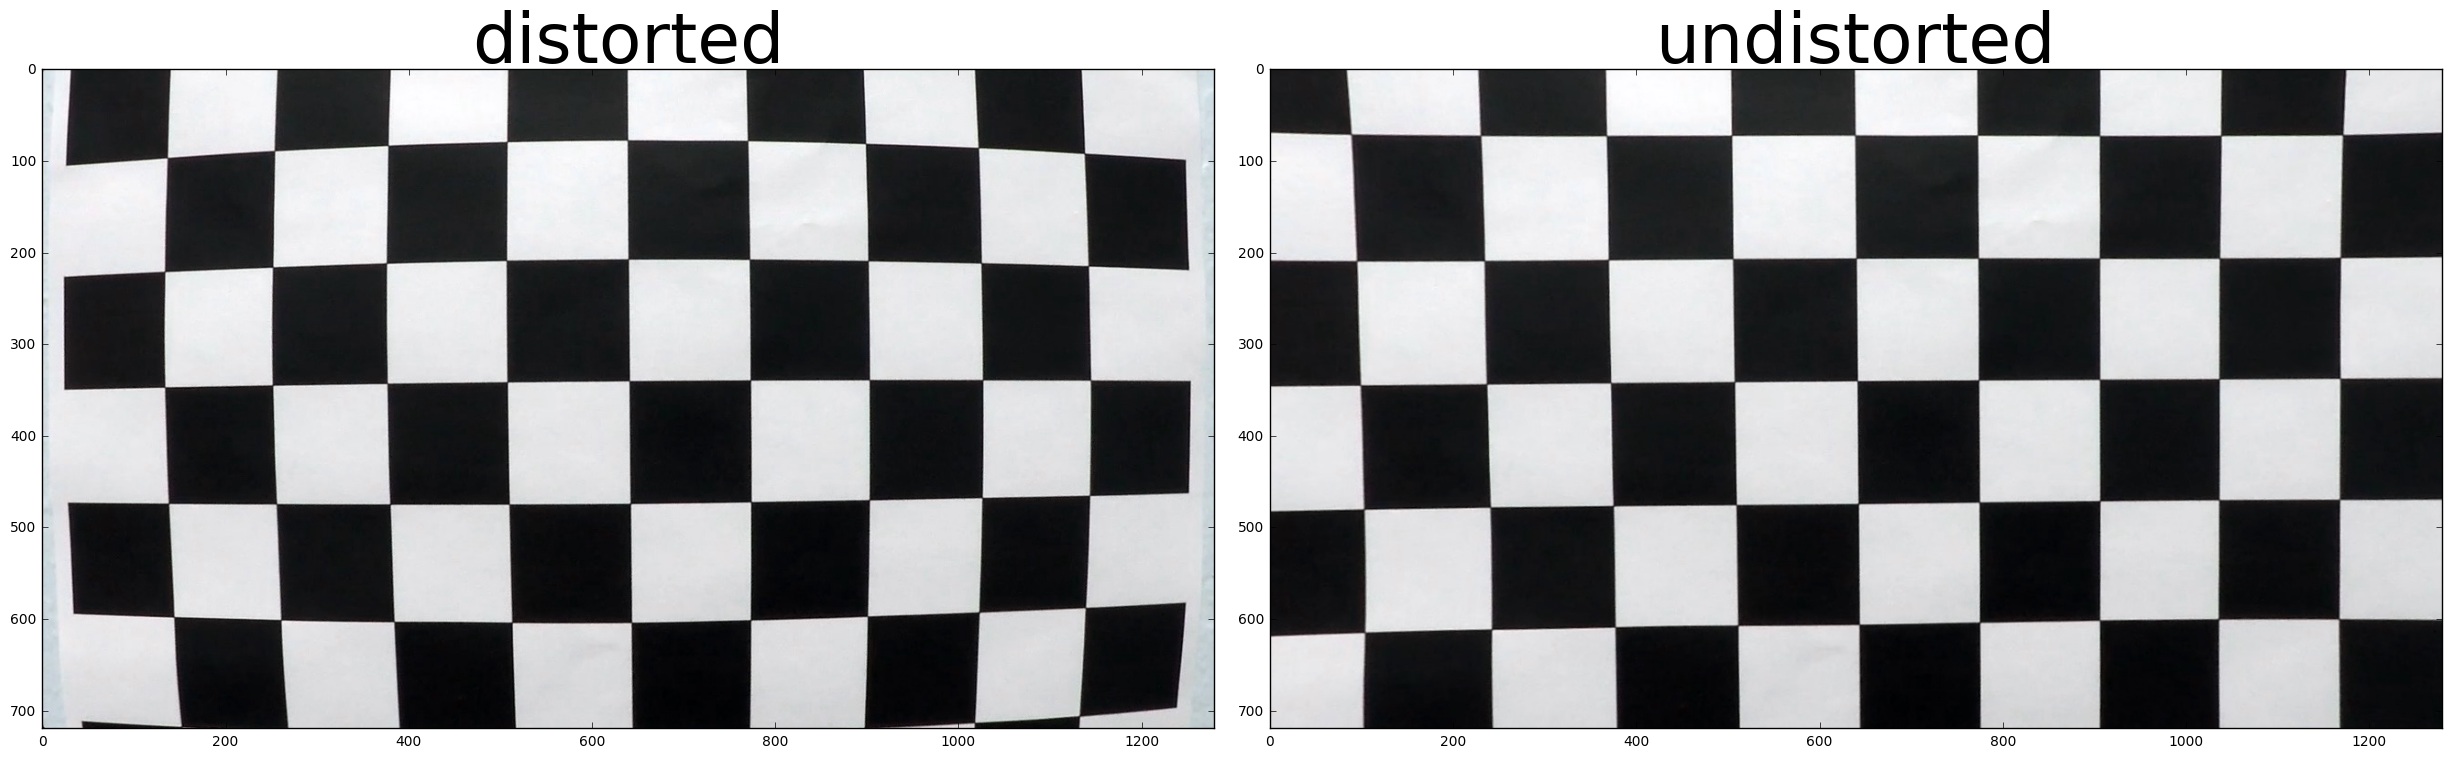

In [2]:
def calibrate(objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)    
    return mtx, dist

def undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)  #
    return undist
mtx, dist = calibrate(objpoints, imgpoints)
cb_img = cv2.imread("CarND-Advanced-Lane-Lines-master/camera_cal/calibration1.jpg")
undistorted_cb = undistort(cb_img, mtx, dist)
cv2.imwrite('CarND-Advanced-Lane-Lines-master/camera_cal/undist_calibration1.jpg', undistorted_cb)

def draw_plots(img1, img2, title1, title2, cmap):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title(title1, fontsize=50)
    ax2.set_title(title2, fontsize=50)
    if cmap=='gray':
        ax2.imshow(img2, cmap='gray')
    else:
        ax2.imshow(img2)
        ax2.set_title(title2, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
draw_plots(cb_img, undistorted_cb, "distorted", "undistorted", 'gray')

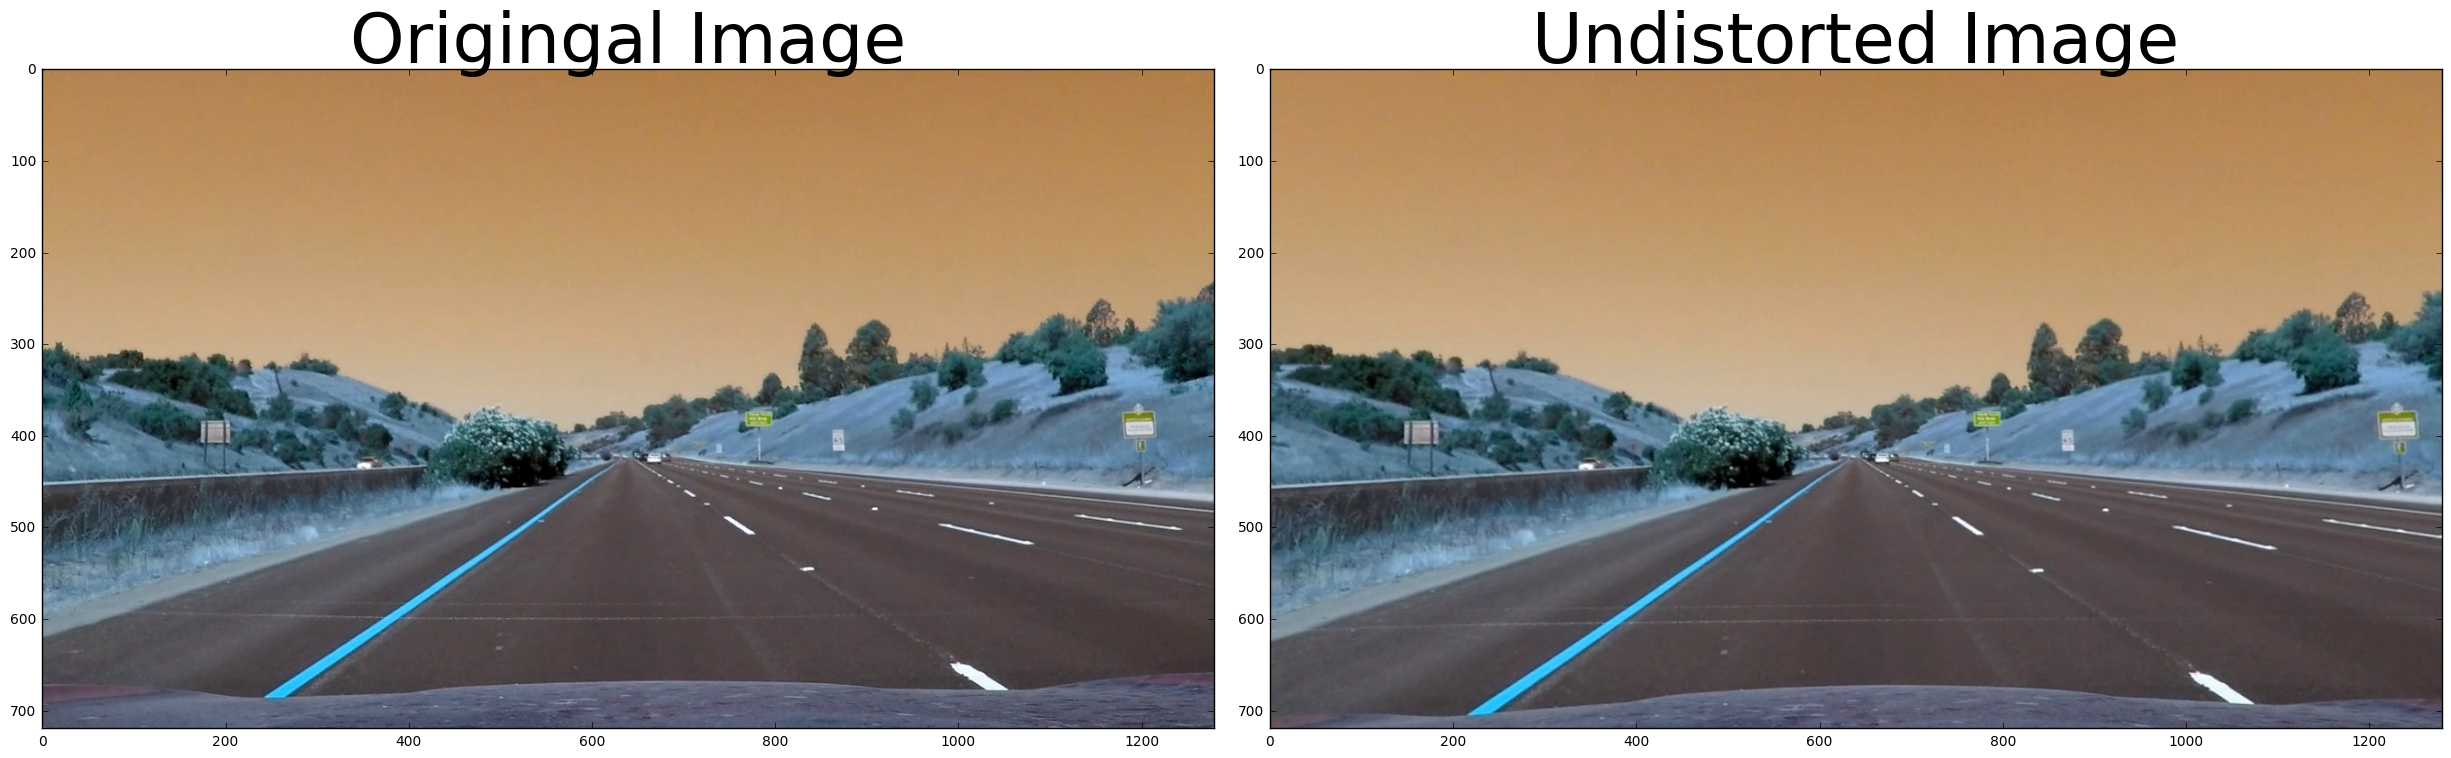

In [3]:
img = cv2.imread('CarND-Advanced-Lane-Lines-master/test_images/straight_lines1.jpg')
#img = cv2.imread('C:/Users/owner/Downloads/self driving car Udacity Nanodegree/CarND_Advanced_Lane_lines/CarND-Advanced-Lane-Lines-master/test_images/straight_lines1.jpg')
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

undistorted = undistort(img, mtx, dist)
#undistorted = cal_undistort(img, objpoints, imgpoints)
cv2.imwrite('CarND-Advanced-Lane-Lines-master/test_images/undistorted_straight_lines1.jpg', undistorted)
draw_plots(img, undistorted, 'Origingal Image', 'Undistorted Image', 'gray')    

In [6]:
def color_pipeline(img, s_thresh=(210, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return color_binary, combined_binary
    
result = color_pipeline(undistorted)
#%matplotlib inline
#print('original')
#plt.imshow(img)
#img.set_title('Original Image', fontsize=40)
#cv2.imwrite('CarND-Advanced-Lane-Lines-master/test_images/binary_test5.png', result[1])
import matplotlib.cm as cm
plt.imsave('CarND-Advanced-Lane-Lines-master/test_images/binary_straight_lines1.png', np.array(result[1]), cmap=cm.gray)

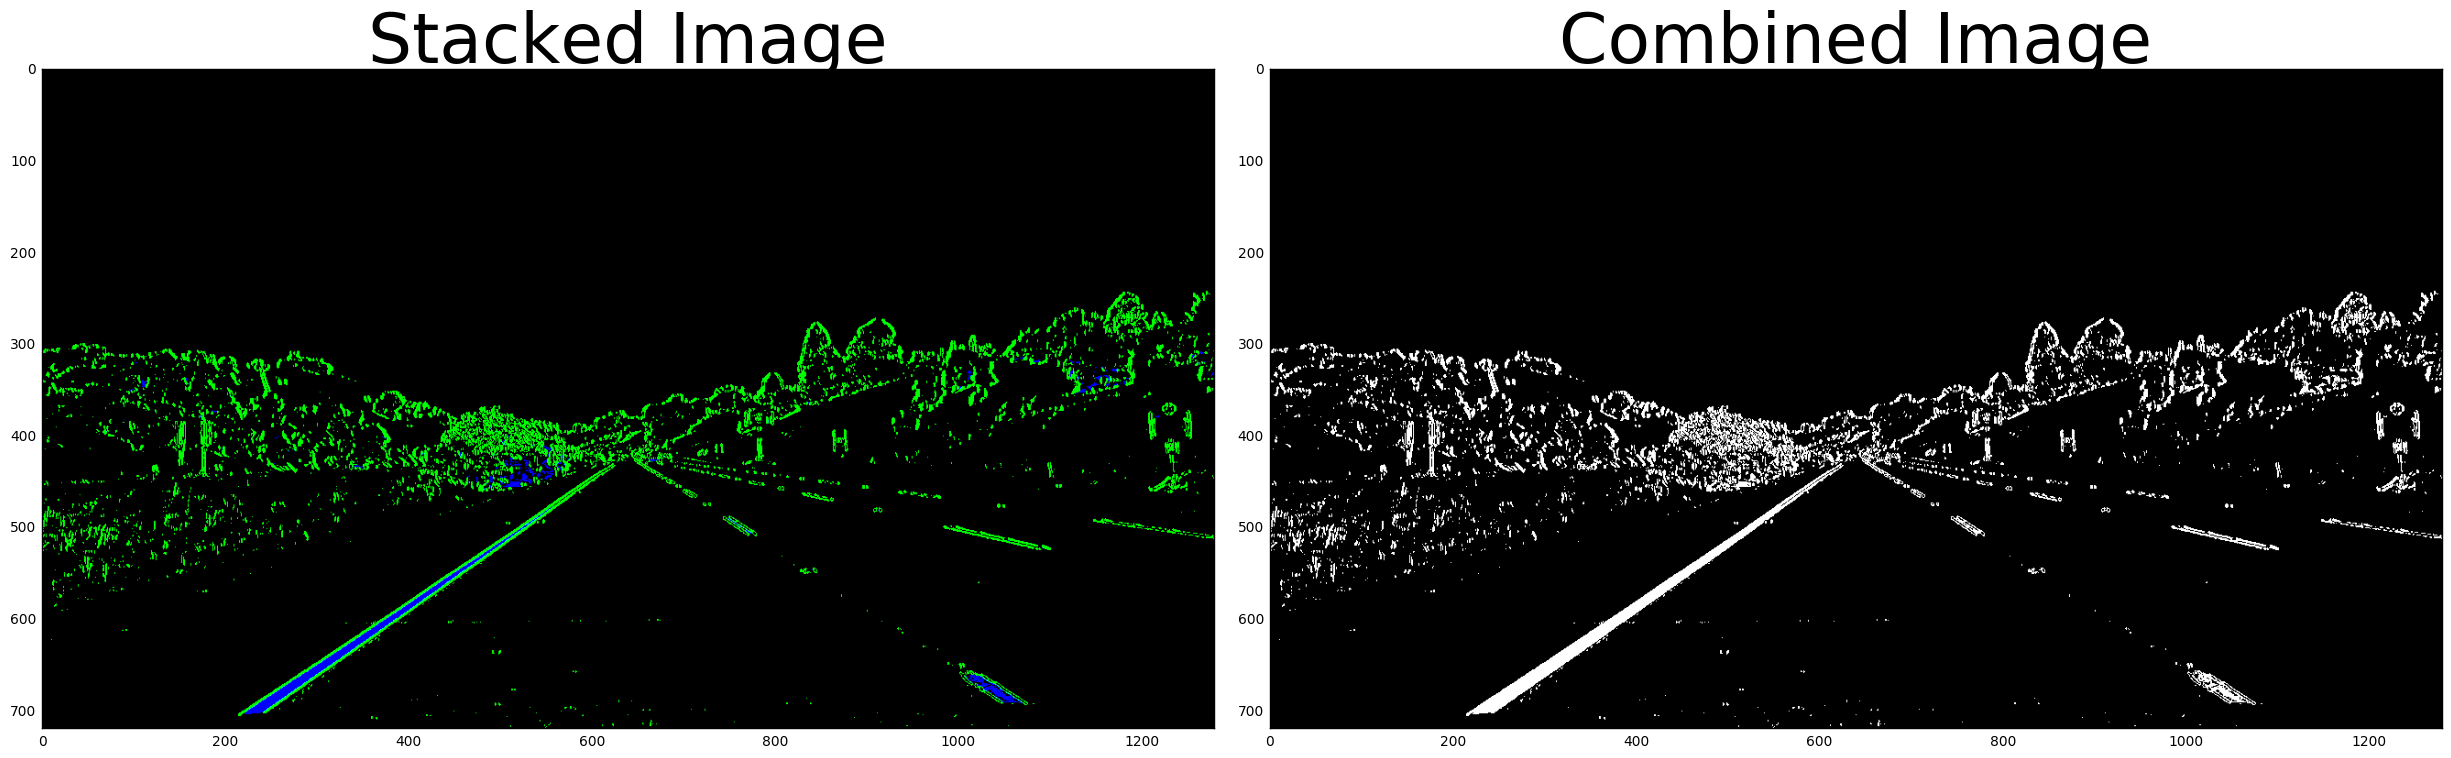

In [7]:
draw_plots(result[0],  result[1], 'Stacked Image','Combined Image', 'gray')

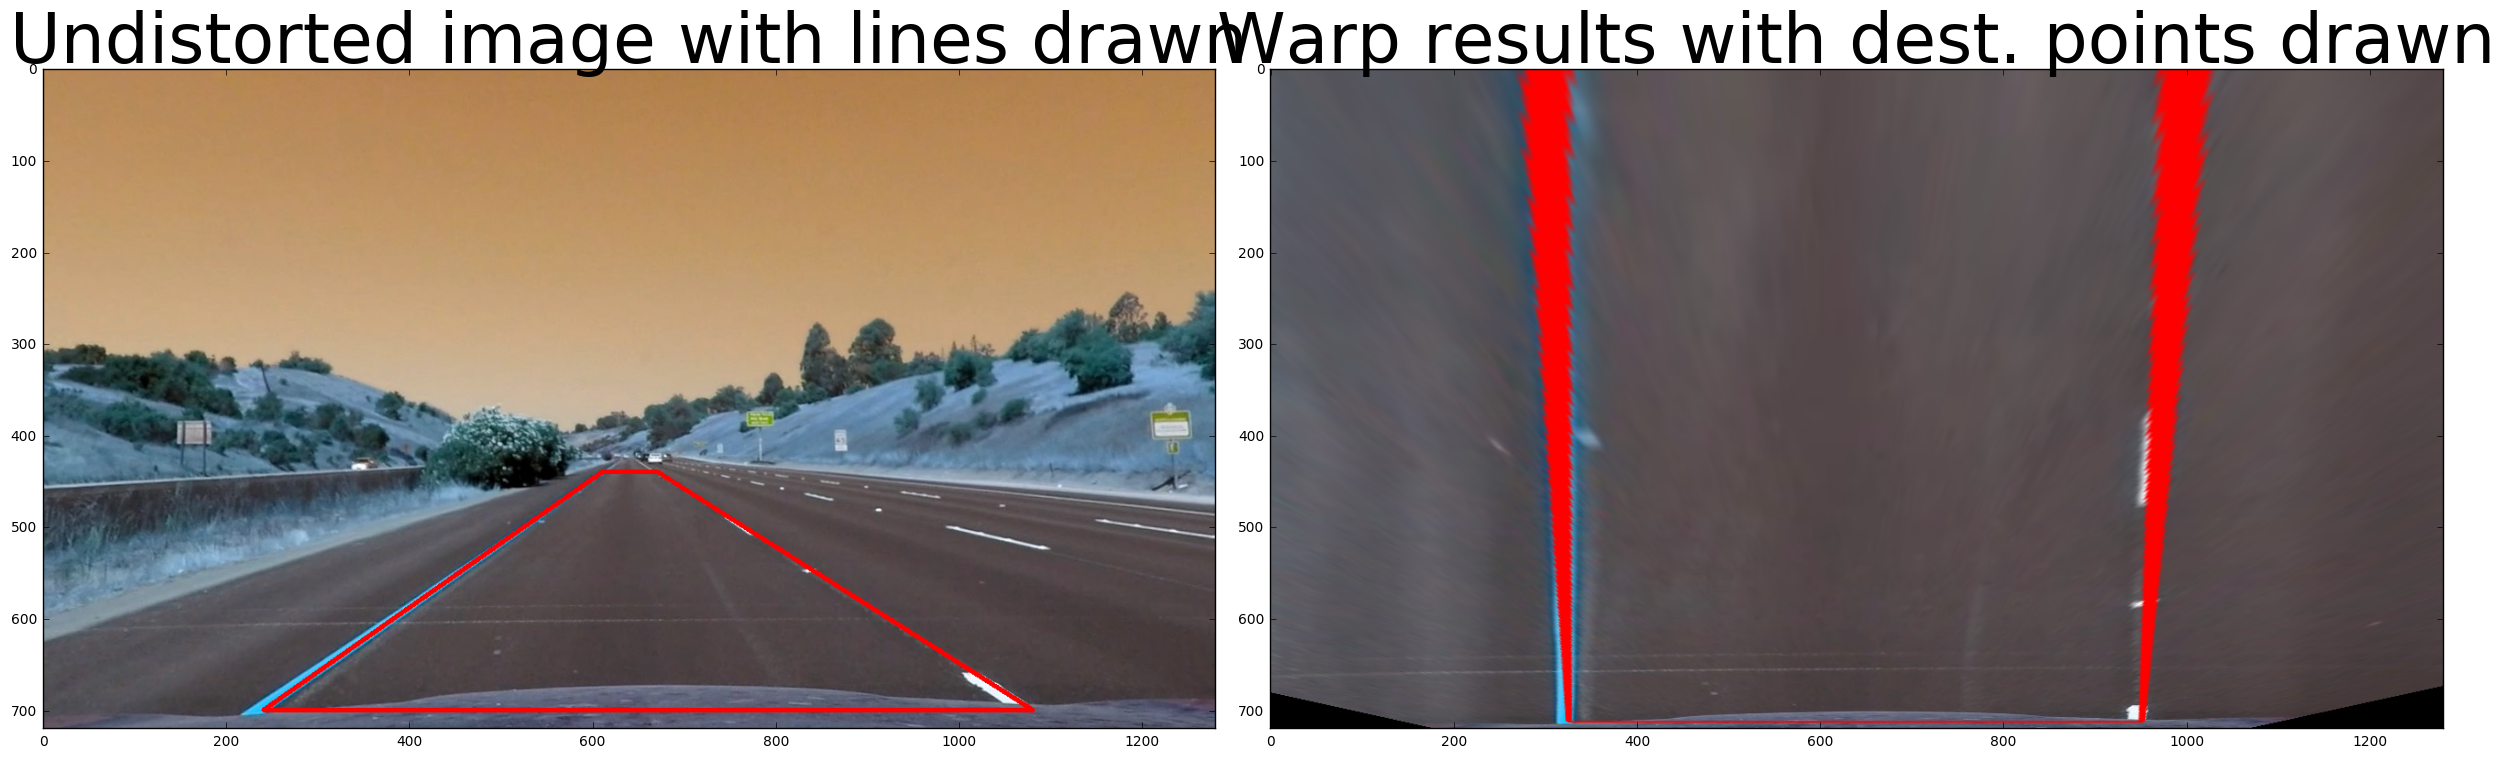

In [8]:
img_size = (undistorted.shape[1], undistorted.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

def warper(src, img, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size)
    return Minv, warped

Minv0, binary_warped = warper(src, result[1], dst)

#lined_image = P1.pipeline(img, 50, 150, 5, 2, np.pi/180, 15,15, 10,'non_solid')
lined_image = cv2.line(undistorted, (240, 700), (610, 440), [255, 0, 0], 3)
lined_image = cv2.line(undistorted, (240, 700), (1080, 700), [255, 0, 0], 3)
lined_image = cv2.line(undistorted, (1080, 700), (670, 440), [255, 0, 0], 3)
lined_image = cv2.line(undistorted, (610, 440), (670, 440), [255, 0, 0], 3)

Minv, warped = warper(src, lined_image, dst)

#plt.imshow(lined_image)
cv2.imwrite('CarND-Advanced-Lane-Lines-master/test_images/lined_image_straight_lines1.jpg', lined_image)
cv2.imwrite('CarND-Advanced-Lane-Lines-master/test_images/warped_straight_lines1.jpg', warped)
draw_plots(lined_image, warped, 'Undistorted image with lines drawn', 'Warp results with dest. points drawn', None)

In [9]:
# Define a class to receive the characteristics of each line detection
class Line():
    #def __init__(self, detected, bestx, best_fit, current_fit, radius_of_curvature, line_base_pos, diffs, allx, ally):    
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        self.invalid_count = None

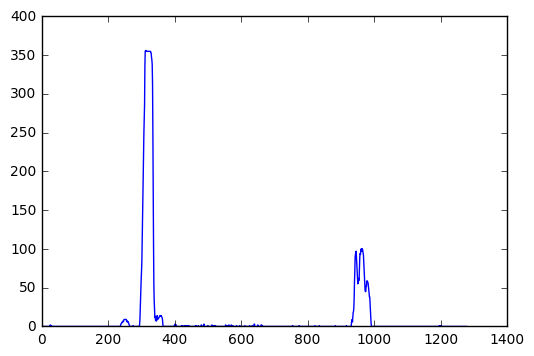

In [10]:
import numpy as np
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

In [11]:
def get_offset_from_center(rightx_base, leftx_base, midpoint):
    return (3.7/700)*abs(((rightx_base-leftx_base)/2)+leftx_base - midpoint)

In [12]:
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines


def initiate_lines(binary_warped):
    left_line = Line()
    right_line = Line()    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    midpoint = np.int(histogram.shape[0]/2)
    #print (histogram.shape[0])
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    offset_from_center = get_offset_from_center(rightx_base,leftx_base, midpoint)

    #line.line_base_pos = line_base_pos

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_line.allx = leftx
    left_line.ally = lefty
    right_line.allx = rightx
    right_line.ally = righty

    print(len(leftx), '  ', len(lefty))
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    left_line.current_fit = left_fit
    right_line.current_fit = right_fit

    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    left_line.recent_xfitted.append(left_fitx)
    right_line.recent_xfitted.append(right_fitx)
    return offset_from_center, left_line, right_line, ploty

offset_from_center, left_line, right_line, ploty = initiate_lines(binary_warped)

29098    29098


19201    19201


TypeError: an integer is required (got type tuple)

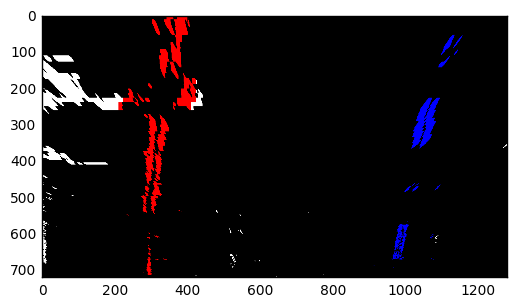

In [52]:
# Generate x and y values for plotting
left_line = Line()
right_line = Line()
img = cv2.imread('CarND-Advanced-Lane-Lines-master/test_images/test5.jpg')
undistorted = undistort(img, mtx, dist)
thresholded = color_pipeline(undistorted)
minv1, binary_warped = warper(src, thresholded[1], dst)
offset_from_center, left_line, right_line, ploty = initiate_lines(binary_warped)
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_line.current_fit[0]*ploty**2 + left_line.current_fit[1]*ploty + left_line.current_fit[2]
right_fitx = right_line.current_fit[0]*ploty**2 + right_line.current_fit[1]*ploty + right_line.current_fit[2]
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
out_img[left_line.ally, left_line.allx] = [255, 0, 0]
out_img[right_line.ally, right_line.allx] = [0, 0, 255]
plt.imshow(out_img)
#print (left_line.recent_xfitted[0])
left_points = np.array(np.column_stack((left_line.recent_xfitted[0], ploty)))
#cv2.polylines(out_img, np.int32([left_points]), 1, (0,255,255))

right_points = np.array(np.column_stack((right_line.recent_xfitted[0], ploty)))
#cv2.polylines(out_img, np.int32([right_points]), 1, (0,255,255))
#cv2.fillPoly(out_img, np.int32([right_points]), 1, (0,255,255))
previous = right_points[0]
line = 
for point in right_points:
    previous = point
    
plt.imsave('CarND-Advanced-Lane-Lines-master/test_images/polynomial_fitted.png', out_img)
plt.plot(left_line.recent_xfitted[0], ploty, color='yellow')
plt.plot(right_line.recent_xfitted[0], ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
#fig = plt.figure()
#fig.savefig('CarND-Advanced-Lane-Lines-master/test_images/polynomial_fitted.png')
#cv2.imwrite('CarND-Advanced-Lane-Lines-master/test_images/polynomial_fitted.png', plt)


In [14]:
def are_roughly_parallel(left_fitx, right_fitx):
    if abs((right_fitx[0] - left_fitx[0]) - (right_fitx[-1] - left_fitx[-1])) < 100:
        return True
    else:
        return False

def have_proper_distance(left_fitx, right_fitx):
    if(600 < (right_fitx[0] - left_fitx[0]) < 720) and (600 < (right_fitx[-1] - left_fitx[-1]) < 720):
        return True
    else:
        return False
    
  

In [15]:
def find_line(binary_warped, left_line, right_line, n):
# Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    if len(left_line.recent_xfitted) == 0 :
        left_line, right_line, ploty = initiate_lines(binary_warped)
    left_fit = left_line.current_fit
    right_fit = right_line.current_fit
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    #print(len(np.average(left_line.recent_xfitted, axis=0)))
    #print (left_fitx, '  ', right_fitx)
    if (are_roughly_parallel(left_fitx, right_fitx)): #and have_proper_distance(left_fitx, right_fitx)):        
        left_line.recent_xfitted.append(left_fitx)
        right_line.recent_xfitted.append(right_fitx)
        if len(left_line.recent_xfitted) > n:
            np.delete(left_line.recent_xfitted, 0)
        left_line.bestx = np.average(left_line.recent_xfitted, axis=0)
        right_line.bestx = np.average(right_line.recent_xfitted, axis=0)
        left_line.allx =  leftx
        left_line.ally = lefty
        right_line.allx = rightx
        right_line.ally = righty
        left_line.current_fit = left_fit
        right_line.current_fit = right_fit
    else:
        left_line.invalid_count =+ 1
        right_line.invalid_count =+ 1
        left_line.recent_xfitted.append(left_line.bestx)
        right_line.recent_xfitted.append(right_line.bestx)
        if(left_line.invalid_count > 20):
            left_line, right_line, ploty = initiate_lines(binary_warped)
            left_line.invalid_count = 0
    #print (left_fitx[-1])
    #print(ploty[-1])
    offset_from_center = get_offset_from_center(right_fitx[0], left_fitx[0], binary_warped.shape[1]/2)
    return offset_from_center, left_line, right_line, ploty
offset_from_center, left_line, right_line, ploty = find_line(binary_warped, left_line, right_line, 20)

#print(left_line.recent_xfitted[-1])
#print(right_line.recent_xfitted[-1])
#    return leftx, lefty, rightx, righty, left_fit, right_fit, ploty, left_fitx, right_fitx
#left_lane_inds, right_lane_inds, leftx, lefty, rightx, righty, left_fit, right_fit, ploty, left_fitx, right_fitx = find_line(binary_warped, left_fit, right_fit)    

In [16]:
def find_curv_pix(ploty, left_line, right_line):
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    left_fit = left_line.current_fit
    right_fit = right_line.current_fit
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    print(left_curverad, right_curverad)
    # Example values: 1926.74 1908.48
    
find_curv_pix(ploty, left_line, right_line)

7827.65552961 2345.69609458


In [17]:
def find_curv_real(left_line, right_line, ploty):
    # Define conversions in x and y from pixels space to meters
    leftx =left_line.allx
    lefty = left_line.ally
    rightx = right_line.allx
    righty = right_line.ally
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    y_eval = np.max(ploty)
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    #print (len(rightx), ' ', len(righty))
    return left_curverad, right_curverad
    # Example values: 632.1 m    626.2 m

find_curv_real(left_line, right_line, ploty)    

2419.04634738 m 762.149728511 m


(2419.0463473756467, 762.14972851056325)

2178.04700318 m 797.697551504 m


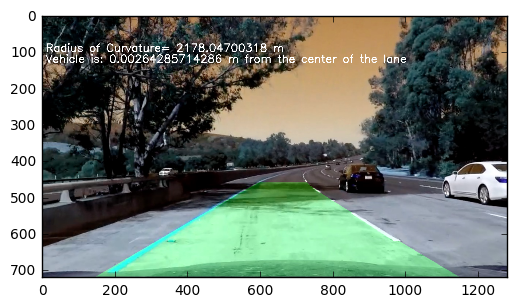

In [54]:

def draw_lane(img, mtx, dist, src, result, dst, ploty, left_line, right_line ):
    # Create an image to draw the lines on
    left_fitx = left_line.recent_xfitted[-1]
    right_fitx = right_line.recent_xfitted[-1]
    undistorted = undistort(img, mtx, dist)
    Minv, binary_warped = warper(src, result[1], dst)
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    # Recast the x and y points into usable format for cv2.fillPoly()
    #print(ploty, '  ', left_fitx)
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
    #plt.imshow(result)
    return result

font = cv2.FONT_HERSHEY_SIMPLEX

def print_curvature(img, left_curverad, right_curverad, offset_from_center):
    text1 = "Radius of Curvature= " + str(left_curverad) + ' m ' 
    text2 = "Vehicle is: " + str(offset_from_center) + ' m from the center of the lane'
    cv2.putText(img, text1,(10,100), font, 1,(255,255,255),2)
    cv2.putText(img, text2,(10,130), font, 1,(255,255,255),2)

left_curverad, right_curverad = find_curv_real(left_line, right_line,  ploty)   

laned_image = draw_lane(img, mtx, dist, src, result, dst, ploty, left_line, right_line)
print_curvature(laned_image, left_curverad, right_curverad, offset_from_center)

cv2.imwrite('CarND-Advanced-Lane-Lines-master/test_images/laned_image.jpg', laned_image)

plt.imshow(laned_image)

In [19]:
img = cv2.imread('C:/Users/owner/Downloads/self driving car Udacity Nanodegree/CarND_Advanced_Lane_lines/CarND-Advanced-Lane-Lines-master/test_images/straight_lines1.jpg')

#left_line= Line()
#right_line = Line()
def Pipeline(img, mtx, dist, left_line, right_line):
    undistorted = undistort(img, mtx, dist)
    result = color_pipeline(undistorted)
    Minv, warped = warper(src, result[1], dst)
    offset_from_center, left_line, right_line, ploty = find_line(warped, left_line, right_line, 30)        
    laned_image = draw_lane(undistorted, mtx, dist, src, result, dst, ploty, left_line, right_line)
    left_curverad, right_curverad = find_curv_real(left_line, right_line, ploty)   
    print_curvature(laned_image, left_curverad, right_curverad, offset_from_center)
    return laned_image
    
#Pipeline(img, mtx, dist, left_fit, right_fit)    

In [20]:
def process_image(img):
    result = Pipeline(img, mtx, dist, left_line, right_line)
    return result

In [21]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [22]:
white_output = 'processed.mp4'
clip1 = VideoFileClip("CarND-Advanced-Lane-Lines-master/project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

651.328133229 m 1376.8896029 m
[MoviePy] >>>> Building video processed.mp4
[MoviePy] Writing video processed.mp4


  0%|                                                 | 0/1261 [00:00<?, ?it/s]

681.152131185 m 922.093630432 m


  0%|                                         | 1/1261 [00:00<04:34,  4.58it/s]

695.663083181 m 972.470141145 m


  0%|                                         | 2/1261 [00:00<04:36,  4.55it/s]

664.530058793 m 598.288855084 m


  0%|                                         | 3/1261 [00:00<04:39,  4.50it/s]

801.123154638 m 567.224616258 m


  0%|▏                                        | 4/1261 [00:00<04:36,  4.55it/s]

771.716285823 m 644.612091239 m


  0%|▏                                        | 5/1261 [00:01<04:34,  4.57it/s]

716.431504379 m 954.211579954 m


  0%|▏                                        | 6/1261 [00:01<04:36,  4.54it/s]

695.029763192 m 1132.74290465 m


  1%|▏                                        | 7/1261 [00:01<04:37,  4.52it/s]

697.272580374 m 2474.42914374 m


  1%|▎                                        | 8/1261 [00:01<04:37,  4.52it/s]

702.062093777 m 1348.26267413 m


  1%|▎                                        | 9/1261 [00:01<04:37,  4.50it/s]

729.176336231 m 2090.04148107 m


  1%|▎                                       | 10/1261 [00:02<04:35,  4.53it/s]

797.749113721 m 1312.67242951 m


  1%|▎                                       | 11/1261 [00:02<04:36,  4.52it/s]

848.647780769 m 1983.1175079 m


  1%|▍                                       | 12/1261 [00:02<04:38,  4.49it/s]

971.226578571 m 1771.50381354 m


  1%|▍                                       | 13/1261 [00:02<04:37,  4.50it/s]

1022.74338952 m 3456.58138637 m


  1%|▍                                       | 14/1261 [00:03<04:39,  4.47it/s]

1010.49953227 m 704.279257057 m


  1%|▍                                       | 15/1261 [00:03<04:34,  4.53it/s]

1795.42295194 m 614.629522919 m


  1%|▌                                       | 16/1261 [00:03<04:33,  4.55it/s]

1200.73674494 m 885.998002404 m


  1%|▌                                       | 17/1261 [00:03<04:32,  4.56it/s]

1204.1572128 m 1192.18546673 m


  1%|▌                                       | 18/1261 [00:03<04:32,  4.57it/s]

1287.003948 m 1439.03469901 m


  2%|▌                                       | 19/1261 [00:04<04:34,  4.53it/s]

1267.71732743 m 1716.48673999 m


  2%|▋                                       | 20/1261 [00:04<04:33,  4.54it/s]

1382.5501396 m 4921.47908908 m


  2%|▋                                       | 21/1261 [00:04<04:30,  4.58it/s]

1196.85065182 m 7535.07217107 m


  2%|▋                                       | 22/1261 [00:04<04:32,  4.55it/s]

1144.24643371 m 7106.70195369 m


  2%|▋                                       | 23/1261 [00:05<04:33,  4.53it/s]

1015.11053636 m 1101.12100983 m


  2%|▊                                       | 24/1261 [00:05<04:34,  4.50it/s]

1009.91146691 m 870.125358835 m


  2%|▊                                       | 25/1261 [00:05<04:37,  4.46it/s]

1245.92015519 m 1073.05459935 m


  2%|▊                                       | 26/1261 [00:05<04:34,  4.49it/s]

941.103579411 m 1366.46978176 m


  2%|▊                                       | 27/1261 [00:05<04:31,  4.54it/s]

941.103579411 m 1366.46978176 m


  2%|▉                                       | 28/1261 [00:06<04:31,  4.54it/s]

1068.18404943 m 856.910914661 m


  2%|▉                                       | 29/1261 [00:06<04:28,  4.59it/s]

1058.51995513 m 568.715360742 m


  2%|▉                                       | 30/1261 [00:06<04:34,  4.49it/s]

830.865206047 m 684.153970615 m


  2%|▉                                       | 31/1261 [00:06<04:33,  4.50it/s]

749.366817236 m 904.366155736 m


  3%|█                                       | 32/1261 [00:07<04:33,  4.49it/s]

761.43822745 m 2013.98517571 m


  3%|█                                       | 33/1261 [00:07<04:31,  4.52it/s]

662.482449217 m 6508.20484925 m


  3%|█                                       | 34/1261 [00:07<04:29,  4.55it/s]

647.233759717 m 130106.9524 m


  3%|█                                       | 35/1261 [00:07<04:28,  4.56it/s]

583.1369049 m 694.128260164 m


  3%|█▏                                      | 36/1261 [00:07<04:31,  4.52it/s]

551.870496115 m 846.202582791 m


  3%|█▏                                      | 37/1261 [00:08<04:32,  4.49it/s]

527.466405071 m 1347.99924049 m


  3%|█▏                                      | 38/1261 [00:08<04:31,  4.51it/s]

506.647625165 m 551.728250198 m


  3%|█▏                                      | 39/1261 [00:08<04:30,  4.52it/s]

523.98594837 m 480.740284585 m


  3%|█▎                                      | 40/1261 [00:08<04:30,  4.51it/s]

524.127597504 m 539.654050836 m


  3%|█▎                                      | 41/1261 [00:09<04:28,  4.54it/s]

555.3781641 m 551.306401262 m


  3%|█▎                                      | 42/1261 [00:09<04:29,  4.53it/s]

615.907986122 m 611.715343681 m


  3%|█▎                                      | 43/1261 [00:09<04:33,  4.45it/s]

576.096430386 m 669.831246172 m


  3%|█▍                                      | 44/1261 [00:09<04:36,  4.41it/s]

623.019981593 m 873.628985688 m


  4%|█▍                                      | 45/1261 [00:09<04:40,  4.33it/s]

655.113791811 m 2198.73012145 m


  4%|█▍                                      | 46/1261 [00:10<04:39,  4.35it/s]

665.368984554 m 7343.24429646 m


  4%|█▍                                      | 47/1261 [00:10<04:36,  4.39it/s]

651.460618995 m 4649.76203441 m


  4%|█▌                                      | 48/1261 [00:10<04:35,  4.40it/s]

676.618661957 m 1062.37772409 m


  4%|█▌                                      | 49/1261 [00:10<04:35,  4.40it/s]

725.729486503 m 713.952089915 m


  4%|█▌                                      | 50/1261 [00:11<04:36,  4.38it/s]

751.925947493 m 1038.61506647 m


  4%|█▌                                      | 51/1261 [00:11<04:35,  4.39it/s]

795.113698006 m 1039.0503944 m


  4%|█▋                                      | 52/1261 [00:11<04:37,  4.36it/s]

995.956536218 m 510.894142392 m


  4%|█▋                                      | 53/1261 [00:11<04:40,  4.31it/s]

1006.52498455 m 525.574335237 m


  4%|█▋                                      | 54/1261 [00:12<04:41,  4.28it/s]

1238.24222144 m 578.544405304 m


  4%|█▋                                      | 55/1261 [00:12<04:39,  4.31it/s]

1348.89229036 m 654.523937334 m


  4%|█▊                                      | 56/1261 [00:12<04:40,  4.30it/s]

1289.79589573 m 881.379323761 m


  5%|█▊                                      | 57/1261 [00:12<04:34,  4.39it/s]

1164.73521008 m 1440.71161006 m


  5%|█▊                                      | 58/1261 [00:12<04:34,  4.39it/s]

1186.1480249 m 62884.243386 m


  5%|█▊                                      | 59/1261 [00:13<04:38,  4.32it/s]

1008.92155881 m 1135.01164423 m


  5%|█▉                                      | 60/1261 [00:13<04:39,  4.30it/s]

834.67079435 m 1978.38448192 m


  5%|█▉                                      | 61/1261 [00:13<04:35,  4.35it/s]

787.486690774 m 820.709600741 m


  5%|█▉                                      | 62/1261 [00:13<04:39,  4.29it/s]

769.242520319 m 961.657076346 m


  5%|█▉                                      | 63/1261 [00:14<04:41,  4.26it/s]

820.966048665 m 620.972722398 m


  5%|██                                      | 64/1261 [00:14<04:41,  4.26it/s]

812.13490691 m 644.890093106 m


  5%|██                                      | 65/1261 [00:14<04:40,  4.27it/s]

800.666613759 m 876.92732921 m


  5%|██                                      | 66/1261 [00:14<04:44,  4.20it/s]

783.418918727 m 929.642519965 m


  5%|██▏                                     | 67/1261 [00:15<04:41,  4.24it/s]

868.338649841 m 1098.79612186 m


  5%|██▏                                     | 68/1261 [00:15<04:43,  4.21it/s]

809.53748565 m 1672.61158726 m


  5%|██▏                                     | 69/1261 [00:15<04:49,  4.11it/s]

901.114542302 m 2217.37661003 m


  6%|██▏                                     | 70/1261 [00:15<04:52,  4.07it/s]

920.683764297 m 1275.16700343 m


  6%|██▎                                     | 71/1261 [00:16<04:56,  4.02it/s]

1124.97181883 m 889.013170034 m


  6%|██▎                                     | 72/1261 [00:16<04:55,  4.02it/s]

1298.19918416 m 781.054353294 m


  6%|██▎                                     | 73/1261 [00:16<04:58,  3.98it/s]

1513.13536831 m 984.62371458 m


  6%|██▎                                     | 74/1261 [00:16<04:47,  4.13it/s]

1574.5882041 m 1217.97902793 m


  6%|██▍                                     | 75/1261 [00:17<04:39,  4.25it/s]

1768.35352019 m 734.818945202 m


  6%|██▍                                     | 76/1261 [00:17<04:37,  4.27it/s]

1839.03764648 m 1040.62994123 m


  6%|██▍                                     | 77/1261 [00:17<04:36,  4.28it/s]

2064.70465994 m 700.981515413 m


  6%|██▍                                     | 78/1261 [00:17<04:32,  4.34it/s]

2269.17600794 m 565.458239225 m


  6%|██▌                                     | 79/1261 [00:17<04:31,  4.35it/s]

2767.3603593 m 536.175971736 m


  6%|██▌                                     | 80/1261 [00:18<04:26,  4.43it/s]

2681.58414272 m 701.165716463 m


  6%|██▌                                     | 81/1261 [00:18<04:23,  4.47it/s]

2507.37629133 m 796.732500807 m


  7%|██▌                                     | 82/1261 [00:18<04:26,  4.42it/s]

1931.5560732 m 1168.72976139 m


  7%|██▋                                     | 83/1261 [00:18<04:35,  4.27it/s]

1770.57106817 m 4172.78540783 m


  7%|██▋                                     | 84/1261 [00:19<04:36,  4.26it/s]

1417.62065218 m 8069.9250947 m


  7%|██▋                                     | 85/1261 [00:19<04:38,  4.22it/s]

1171.27524443 m 7013.93532395 m


  7%|██▋                                     | 86/1261 [00:19<04:34,  4.27it/s]

966.728875987 m 1223.41161047 m


  7%|██▊                                     | 87/1261 [00:19<04:36,  4.25it/s]

885.568902706 m 2658.49972691 m


  7%|██▊                                     | 88/1261 [00:20<04:33,  4.29it/s]

749.818132204 m 970.407834541 m


  7%|██▊                                     | 89/1261 [00:20<04:31,  4.32it/s]

705.751883023 m 605.961966273 m


  7%|██▊                                     | 90/1261 [00:20<04:50,  4.03it/s]

720.720446108 m 653.790861588 m


  7%|██▉                                     | 91/1261 [00:20<04:58,  3.92it/s]

768.267821625 m 714.48566264 m


  7%|██▉                                     | 92/1261 [00:21<05:08,  3.78it/s]

712.781314722 m 901.734742435 m


  7%|██▉                                     | 93/1261 [00:21<06:04,  3.20it/s]

708.834995297 m 1034.41950607 m


  7%|██▉                                     | 94/1261 [00:21<06:53,  2.82it/s]

723.557448064 m 1335.51599194 m


  8%|███                                     | 95/1261 [00:22<06:20,  3.06it/s]

717.727652697 m 2786.77665982 m


  8%|███                                     | 96/1261 [00:22<05:47,  3.35it/s]

727.904328786 m 4127.82240974 m


  8%|███                                     | 97/1261 [00:22<05:23,  3.59it/s]

748.277728732 m 1265.35315468 m


  8%|███                                     | 98/1261 [00:22<05:04,  3.82it/s]

760.823162277 m 927.344085135 m


  8%|███▏                                    | 99/1261 [00:23<04:51,  3.99it/s]

771.815776384 m 1007.34310236 m


  8%|███                                    | 100/1261 [00:23<04:45,  4.06it/s]

758.954899715 m 933.978527355 m


  8%|███                                    | 101/1261 [00:23<04:40,  4.13it/s]

757.267624592 m 646.12003334 m


  8%|███▏                                   | 102/1261 [00:23<04:38,  4.16it/s]

797.893431601 m 533.18286924 m


  8%|███▏                                   | 103/1261 [00:24<04:30,  4.28it/s]

817.83351256 m 585.840783651 m


  8%|███▏                                   | 104/1261 [00:24<04:29,  4.29it/s]

916.219169816 m 641.450040993 m


  8%|███▏                                   | 105/1261 [00:24<04:30,  4.27it/s]

904.409486084 m 678.821568017 m


  8%|███▎                                   | 106/1261 [00:24<04:28,  4.31it/s]

953.02003302 m 723.112965945 m


  8%|███▎                                   | 107/1261 [00:25<04:27,  4.31it/s]

800.368747382 m 939.736466025 m


  9%|███▎                                   | 108/1261 [00:25<04:22,  4.40it/s]

776.396814542 m 2339.5400552 m


  9%|███▎                                   | 109/1261 [00:25<04:20,  4.42it/s]

793.251382506 m 5690.32181314 m


  9%|███▍                                   | 110/1261 [00:25<04:20,  4.42it/s]

762.451207534 m 1581.11050631 m


  9%|███▍                                   | 111/1261 [00:25<04:23,  4.36it/s]

746.334776126 m 1148.52508509 m


  9%|███▍                                   | 112/1261 [00:26<04:23,  4.37it/s]

695.592122473 m 691.639808574 m


  9%|███▍                                   | 113/1261 [00:26<04:23,  4.36it/s]

694.254274442 m 844.450007202 m


  9%|███▌                                   | 114/1261 [00:26<04:19,  4.41it/s]

651.902597898 m 544.763781468 m


  9%|███▌                                   | 115/1261 [00:26<04:25,  4.32it/s]

740.525459657 m 488.641601512 m


  9%|███▌                                   | 116/1261 [00:27<04:20,  4.40it/s]

675.595378072 m 521.689664104 m


  9%|███▌                                   | 117/1261 [00:27<04:19,  4.41it/s]

734.03848681 m 568.19549325 m


  9%|███▋                                   | 118/1261 [00:27<04:20,  4.39it/s]

749.806739507 m 658.354273266 m


  9%|███▋                                   | 119/1261 [00:27<04:24,  4.32it/s]

673.040896083 m 733.467859684 m


 10%|███▋                                   | 120/1261 [00:27<04:24,  4.32it/s]

666.667792829 m 1128.14459357 m


 10%|███▋                                   | 121/1261 [00:28<04:25,  4.29it/s]

646.67142586 m 818.205668233 m


 10%|███▊                                   | 122/1261 [00:28<04:27,  4.26it/s]

606.476647399 m 669.231628535 m


 10%|███▊                                   | 123/1261 [00:28<04:28,  4.24it/s]

593.275965862 m 1463.66712674 m


 10%|███▊                                   | 124/1261 [00:28<04:26,  4.26it/s]

589.881223737 m 781.919940355 m


 10%|███▊                                   | 125/1261 [00:29<04:23,  4.31it/s]

610.164311437 m 1328.69275495 m


 10%|███▉                                   | 126/1261 [00:29<04:24,  4.28it/s]

593.007379229 m 494.268768488 m


 10%|███▉                                   | 127/1261 [00:29<04:33,  4.15it/s]

637.96439595 m 490.974828066 m


 10%|███▉                                   | 128/1261 [00:29<04:30,  4.18it/s]

622.988216652 m 516.651489381 m


 10%|███▉                                   | 129/1261 [00:30<04:31,  4.17it/s]

694.228806306 m 599.888993874 m


 10%|████                                   | 130/1261 [00:30<04:31,  4.16it/s]

713.841980613 m 700.02709182 m


 10%|████                                   | 131/1261 [00:30<04:36,  4.09it/s]

681.43111695 m 750.236484215 m


 10%|████                                   | 132/1261 [00:30<04:35,  4.09it/s]

694.653069142 m 861.92202966 m


 11%|████                                   | 133/1261 [00:31<04:34,  4.10it/s]

684.084381115 m 823.535102523 m


 11%|████▏                                  | 134/1261 [00:31<04:29,  4.18it/s]

670.505785835 m 745.827588246 m


 11%|████▏                                  | 135/1261 [00:31<04:24,  4.26it/s]

667.976559687 m 920.322744547 m


 11%|████▏                                  | 136/1261 [00:31<04:21,  4.31it/s]

712.155941773 m 1283.87166959 m


 11%|████▏                                  | 137/1261 [00:32<04:33,  4.11it/s]

752.573829637 m 1720.54266374 m


 11%|████▎                                  | 138/1261 [00:32<04:32,  4.12it/s]

759.592089809 m 2342.50062571 m


 11%|████▎                                  | 139/1261 [00:32<04:34,  4.09it/s]

824.752417719 m 1886.02295312 m


 11%|████▎                                  | 140/1261 [00:32<04:33,  4.10it/s]

864.348858892 m 764.953546168 m


 11%|████▎                                  | 141/1261 [00:33<04:29,  4.15it/s]

979.306175879 m 644.831988132 m


 11%|████▍                                  | 142/1261 [00:33<04:45,  3.92it/s]

973.123758285 m 879.971681156 m


 11%|████▍                                  | 143/1261 [00:33<04:39,  4.00it/s]

975.174221166 m 1040.55028209 m


 11%|████▍                                  | 144/1261 [00:33<04:43,  3.94it/s]

1057.26044657 m 1214.79044164 m


 11%|████▍                                  | 145/1261 [00:34<04:45,  3.91it/s]

1001.32519782 m 2188.11072017 m


 12%|████▌                                  | 146/1261 [00:34<04:39,  4.00it/s]

1008.55877134 m 6788.93229216 m


 12%|████▌                                  | 147/1261 [00:34<04:33,  4.07it/s]

878.788631364 m 753.975257645 m


 12%|████▌                                  | 148/1261 [00:34<04:29,  4.13it/s]

863.628346025 m 941.398874608 m


 12%|████▌                                  | 149/1261 [00:35<04:26,  4.18it/s]

931.996101501 m 965.144717143 m


 12%|████▋                                  | 150/1261 [00:35<04:26,  4.17it/s]

908.696748923 m 573.282236544 m


 12%|████▋                                  | 151/1261 [00:35<04:27,  4.15it/s]

1031.53717972 m 615.273189676 m


 12%|████▋                                  | 152/1261 [00:35<04:24,  4.20it/s]

947.078638666 m 537.510378111 m


 12%|████▋                                  | 153/1261 [00:35<04:19,  4.27it/s]

1070.99629267 m 581.947640657 m


 12%|████▊                                  | 154/1261 [00:36<04:19,  4.27it/s]

1032.66981598 m 654.349778665 m


 12%|████▊                                  | 155/1261 [00:36<04:22,  4.22it/s]

1003.12130382 m 734.114493821 m


 12%|████▊                                  | 156/1261 [00:36<04:25,  4.16it/s]

929.077357908 m 857.360057875 m


 12%|████▊                                  | 157/1261 [00:36<04:32,  4.05it/s]

899.170154826 m 1455.64232826 m


 13%|████▉                                  | 158/1261 [00:37<04:26,  4.14it/s]

887.86385031 m 3904.00238816 m


 13%|████▉                                  | 159/1261 [00:37<04:24,  4.17it/s]

761.858979446 m 1519.43653447 m


 13%|████▉                                  | 160/1261 [00:37<04:56,  3.71it/s]

799.521848322 m 1100.49267238 m


 13%|████▉                                  | 161/1261 [00:38<05:13,  3.50it/s]

810.65474996 m 1345.61841389 m


 13%|█████                                  | 162/1261 [00:38<05:09,  3.55it/s]

843.866994651 m 2945.42606911 m


 13%|█████                                  | 163/1261 [00:38<06:02,  3.03it/s]

775.321454801 m 10479.3650378 m


 13%|█████                                  | 164/1261 [00:39<05:50,  3.13it/s]

789.627407319 m 603.735526733 m


 13%|█████                                  | 165/1261 [00:39<05:37,  3.24it/s]

765.469745731 m 686.51394194 m


 13%|█████▏                                 | 166/1261 [00:39<05:24,  3.38it/s]

848.161652629 m 805.587410784 m


 13%|█████▏                                 | 167/1261 [00:39<05:13,  3.49it/s]

878.731767759 m 842.737259392 m


 13%|█████▏                                 | 168/1261 [00:40<04:56,  3.68it/s]

900.504453102 m 853.435473608 m


 13%|█████▏                                 | 169/1261 [00:40<04:57,  3.67it/s]

959.281489671 m 1054.07192183 m


 13%|█████▎                                 | 170/1261 [00:40<04:42,  3.86it/s]

1062.37392126 m 1143.25297136 m


 14%|█████▎                                 | 171/1261 [00:40<04:35,  3.95it/s]

1067.24819053 m 1505.75814161 m


 14%|█████▎                                 | 172/1261 [00:41<04:25,  4.10it/s]

1067.81444324 m 409.077342907 m


 14%|█████▎                                 | 173/1261 [00:41<04:24,  4.12it/s]

860.991361332 m 484.383317915 m


 14%|█████▍                                 | 174/1261 [00:41<04:21,  4.16it/s]

819.047580871 m 381.110098288 m


 14%|█████▍                                 | 175/1261 [00:41<04:20,  4.17it/s]

821.331173662 m 314.285327644 m


 14%|█████▍                                 | 176/1261 [00:42<04:17,  4.21it/s]

874.196266843 m 336.969581589 m


 14%|█████▍                                 | 177/1261 [00:42<04:12,  4.29it/s]

845.152376175 m 363.113671825 m


 14%|█████▌                                 | 178/1261 [00:42<04:12,  4.30it/s]

888.579369723 m 388.240735281 m


 14%|█████▌                                 | 179/1261 [00:42<04:11,  4.30it/s]

868.764089671 m 411.989838238 m


 14%|█████▌                                 | 180/1261 [00:42<04:12,  4.29it/s]

734.0416281 m 470.096242815 m


 14%|█████▌                                 | 181/1261 [00:43<04:08,  4.34it/s]

737.325212362 m 536.297414569 m


 14%|█████▋                                 | 182/1261 [00:43<04:06,  4.37it/s]

619.708200457 m 664.728462604 m


 15%|█████▋                                 | 183/1261 [00:43<04:06,  4.38it/s]

579.244760572 m 685.706957816 m


 15%|█████▋                                 | 184/1261 [00:43<04:09,  4.32it/s]

552.828767346 m 753.774317388 m


 15%|█████▋                                 | 185/1261 [00:44<04:05,  4.38it/s]

500.460945168 m 402.803099584 m


 15%|█████▊                                 | 186/1261 [00:44<04:02,  4.43it/s]

506.80117456 m 396.579347015 m


 15%|█████▊                                 | 187/1261 [00:44<04:02,  4.44it/s]

515.390201829 m 457.164835895 m


 15%|█████▊                                 | 188/1261 [00:44<04:07,  4.34it/s]

503.808242088 m 508.727272728 m


 15%|█████▊                                 | 189/1261 [00:45<04:06,  4.35it/s]

524.255146677 m 570.864460555 m


 15%|█████▉                                 | 190/1261 [00:45<04:00,  4.45it/s]

504.12145749 m 672.048813126 m


 15%|█████▉                                 | 191/1261 [00:45<04:02,  4.41it/s]

535.943328239 m 671.57930297 m


 15%|█████▉                                 | 192/1261 [00:45<04:07,  4.32it/s]

550.190099362 m 631.970393233 m


 15%|█████▉                                 | 193/1261 [00:45<04:05,  4.36it/s]

567.01623456 m 556.772518262 m


 15%|██████                                 | 194/1261 [00:46<04:04,  4.37it/s]

594.368869837 m 527.239653618 m


 15%|██████                                 | 195/1261 [00:46<04:02,  4.39it/s]

655.067416536 m 818.400893431 m


 16%|██████                                 | 196/1261 [00:46<04:03,  4.37it/s]

669.13987208 m 4751.26707998 m


 16%|██████                                 | 197/1261 [00:46<04:02,  4.39it/s]

748.99491149 m 7505.01708506 m


 16%|██████                                 | 198/1261 [00:47<04:01,  4.39it/s]

851.183994852 m 4658.84113733 m


 16%|██████▏                                | 199/1261 [00:47<04:03,  4.36it/s]

878.853324557 m 1141.6701 m


 16%|██████▏                                | 200/1261 [00:47<04:02,  4.37it/s]

895.930703383 m 729.963712315 m


 16%|██████▏                                | 201/1261 [00:47<04:07,  4.28it/s]

864.898962298 m 1272.01318066 m


 16%|██████▏                                | 202/1261 [00:48<04:08,  4.26it/s]

909.26364217 m 830.788393649 m


 16%|██████▎                                | 203/1261 [00:48<04:05,  4.32it/s]

1011.51858359 m 550.547993163 m


 16%|██████▎                                | 204/1261 [00:48<04:04,  4.32it/s]

899.099257672 m 587.123069203 m


 16%|██████▎                                | 205/1261 [00:48<04:06,  4.29it/s]

802.405087682 m 671.764498077 m


 16%|██████▎                                | 206/1261 [00:48<04:03,  4.33it/s]

730.321214403 m 822.531803304 m


 16%|██████▍                                | 207/1261 [00:49<04:02,  4.35it/s]

660.668482744 m 768.479986008 m


 16%|██████▍                                | 208/1261 [00:49<04:04,  4.31it/s]

693.527412634 m 712.50298662 m


 17%|██████▍                                | 209/1261 [00:49<04:04,  4.30it/s]

665.1443063 m 589.270780278 m


 17%|██████▍                                | 210/1261 [00:49<04:00,  4.37it/s]

695.260008735 m 655.087577743 m


 17%|██████▌                                | 211/1261 [00:50<03:59,  4.39it/s]

673.20232061 m 738.97387706 m


 17%|██████▌                                | 212/1261 [00:50<03:58,  4.39it/s]

665.669979429 m 1131.40359488 m


 17%|██████▌                                | 213/1261 [00:50<04:01,  4.34it/s]

639.893651029 m 1173.6638244 m


 17%|██████▌                                | 214/1261 [00:50<04:02,  4.31it/s]

622.633491639 m 543.64962966 m


 17%|██████▋                                | 215/1261 [00:51<04:03,  4.30it/s]

643.22066926 m 586.576907287 m


 17%|██████▋                                | 216/1261 [00:51<04:01,  4.32it/s]

642.997271779 m 695.131351931 m


 17%|██████▋                                | 217/1261 [00:51<04:01,  4.32it/s]

699.467783857 m 782.197158098 m


 17%|██████▋                                | 218/1261 [00:51<04:05,  4.25it/s]

721.906148755 m 1099.46149741 m


 17%|██████▊                                | 219/1261 [00:51<04:04,  4.27it/s]

773.149289577 m 2264.73652797 m


 17%|██████▊                                | 220/1261 [00:52<04:05,  4.24it/s]

744.103183696 m 4172.40139994 m


 18%|██████▊                                | 221/1261 [00:52<04:03,  4.26it/s]

758.626936067 m 4884.49607289 m


 18%|██████▊                                | 222/1261 [00:52<04:38,  3.73it/s]

783.729467439 m 1246.21641772 m


 18%|██████▉                                | 223/1261 [00:53<05:29,  3.15it/s]

762.688867908 m 1539.84886192 m


 18%|██████▉                                | 224/1261 [00:53<06:04,  2.84it/s]

773.93185083 m 2460.08662818 m


 18%|██████▉                                | 225/1261 [00:53<06:00,  2.88it/s]

822.323651877 m 619.882442021 m


 18%|██████▉                                | 226/1261 [00:54<05:24,  3.19it/s]

899.993063825 m 603.136007794 m


 18%|███████                                | 227/1261 [00:54<05:01,  3.43it/s]

1014.29566983 m 647.110869046 m


 18%|███████                                | 228/1261 [00:54<04:42,  3.66it/s]

1039.29417544 m 769.719458503 m


 18%|███████                                | 229/1261 [00:54<04:27,  3.85it/s]

1083.34444196 m 780.893974082 m


 18%|███████                                | 230/1261 [00:55<04:23,  3.92it/s]

1027.15133848 m 887.051893534 m


 18%|███████▏                               | 231/1261 [00:55<04:13,  4.06it/s]

1063.96737428 m 1065.92922787 m


 18%|███████▏                               | 232/1261 [00:55<04:05,  4.20it/s]

1102.6250648 m 2667.61173755 m


 18%|███████▏                               | 233/1261 [00:55<04:01,  4.25it/s]

1101.54851437 m 1279.61749828 m


 19%|███████▏                               | 234/1261 [00:56<03:53,  4.39it/s]

1094.53120744 m 621.668989155 m


 19%|███████▎                               | 235/1261 [00:56<03:54,  4.37it/s]

1030.84669792 m 839.196684486 m


 19%|███████▎                               | 236/1261 [00:56<03:54,  4.36it/s]

962.328223909 m 792.199575544 m


 19%|███████▎                               | 237/1261 [00:56<03:55,  4.35it/s]

899.456567223 m 432.075837799 m


 19%|███████▎                               | 238/1261 [00:56<03:57,  4.31it/s]

887.125717891 m 430.5338936 m


 19%|███████▍                               | 239/1261 [00:57<03:57,  4.31it/s]

864.101491968 m 472.470493201 m


 19%|███████▍                               | 240/1261 [00:57<03:58,  4.28it/s]

907.739602977 m 540.971706452 m


 19%|███████▍                               | 241/1261 [00:57<03:57,  4.30it/s]

915.44439246 m 552.612130308 m


 19%|███████▍                               | 242/1261 [00:57<03:57,  4.30it/s]

832.632370265 m 608.275066712 m


 19%|███████▌                               | 243/1261 [00:58<03:56,  4.30it/s]

832.480134543 m 696.757694679 m


 19%|███████▌                               | 244/1261 [00:58<03:54,  4.33it/s]

777.924088466 m 682.456618284 m


 19%|███████▌                               | 245/1261 [00:58<03:52,  4.38it/s]

728.682816988 m 724.068402713 m


 20%|███████▌                               | 246/1261 [00:58<03:56,  4.30it/s]

749.673548431 m 823.651355151 m


 20%|███████▋                               | 247/1261 [00:59<03:51,  4.38it/s]

695.883506633 m 466.032372005 m


 20%|███████▋                               | 248/1261 [00:59<03:53,  4.34it/s]

715.64586557 m 432.483644118 m


 20%|███████▋                               | 249/1261 [00:59<03:57,  4.26it/s]

733.306121125 m 466.298975123 m


 20%|███████▋                               | 250/1261 [00:59<03:58,  4.23it/s]

774.977341544 m 476.485069776 m


 20%|███████▊                               | 251/1261 [00:59<03:57,  4.26it/s]

752.115703439 m 577.769347295 m


 20%|███████▊                               | 252/1261 [01:00<03:56,  4.27it/s]

846.677084918 m 633.310254687 m


 20%|███████▊                               | 253/1261 [01:00<03:55,  4.27it/s]

880.33188814 m 667.284173333 m


 20%|███████▊                               | 254/1261 [01:00<03:52,  4.33it/s]

902.525900341 m 797.141242588 m


 20%|███████▉                               | 255/1261 [01:00<03:51,  4.35it/s]

900.243780965 m 802.064240122 m


 20%|███████▉                               | 256/1261 [01:01<03:52,  4.32it/s]

869.322748702 m 569.426494709 m


 20%|███████▉                               | 257/1261 [01:01<03:57,  4.23it/s]

867.640298548 m 533.923317878 m


 20%|███████▉                               | 258/1261 [01:01<03:53,  4.29it/s]

891.392254811 m 613.359079164 m


 21%|████████                               | 259/1261 [01:01<03:55,  4.25it/s]

937.133166452 m 478.425336549 m


 21%|████████                               | 260/1261 [01:02<03:55,  4.26it/s]

957.863117797 m 632.199904859 m


 21%|████████                               | 261/1261 [01:02<03:54,  4.27it/s]

987.787975777 m 440.764991125 m


 21%|████████                               | 262/1261 [01:02<03:57,  4.21it/s]

1026.32121922 m 467.489630321 m


 21%|████████▏                              | 263/1261 [01:02<03:58,  4.18it/s]

1006.59836606 m 530.101252894 m


 21%|████████▏                              | 264/1261 [01:03<03:56,  4.22it/s]

1043.5494873 m 599.638003837 m


 21%|████████▏                              | 265/1261 [01:03<03:54,  4.24it/s]

1026.8875664 m 642.393347484 m


 21%|████████▏                              | 266/1261 [01:03<03:53,  4.26it/s]

942.333103011 m 806.247948262 m


 21%|████████▎                              | 267/1261 [01:03<03:55,  4.23it/s]

922.849001168 m 918.431147737 m


 21%|████████▎                              | 268/1261 [01:03<03:54,  4.23it/s]

948.285816366 m 1279.08479779 m


 21%|████████▎                              | 269/1261 [01:04<03:56,  4.19it/s]

954.15158261 m 9628.93302681 m


 21%|████████▎                              | 270/1261 [01:04<03:51,  4.28it/s]

808.527739522 m 795.050247403 m


 21%|████████▍                              | 271/1261 [01:04<03:51,  4.28it/s]

804.693207509 m 1154.24934252 m


 22%|████████▍                              | 272/1261 [01:04<03:54,  4.21it/s]

805.28614976 m 807.365226313 m


 22%|████████▍                              | 273/1261 [01:05<03:55,  4.19it/s]

760.222382584 m 576.171928986 m


 22%|████████▍                              | 274/1261 [01:05<03:53,  4.22it/s]

791.612181547 m 634.416329099 m


 22%|████████▌                              | 275/1261 [01:05<03:53,  4.22it/s]

907.985387339 m 733.944363518 m


 22%|████████▌                              | 276/1261 [01:05<03:54,  4.20it/s]

957.715933083 m 855.927246374 m


 22%|████████▌                              | 277/1261 [01:06<03:56,  4.16it/s]

1043.51024925 m 941.622458568 m


 22%|████████▌                              | 278/1261 [01:06<03:52,  4.23it/s]

1014.68282169 m 1211.42083776 m


 22%|████████▋                              | 279/1261 [01:06<03:54,  4.19it/s]

1129.87232211 m 1236.51464854 m


 22%|████████▋                              | 280/1261 [01:06<03:52,  4.22it/s]

1138.28503193 m 1965.13625129 m


 22%|████████▋                              | 281/1261 [01:07<03:51,  4.23it/s]

1207.15629717 m 1010.69094634 m


 22%|████████▋                              | 282/1261 [01:07<03:54,  4.18it/s]

1221.05966097 m 1123.81055084 m


 22%|████████▊                              | 283/1261 [01:07<03:51,  4.23it/s]

1299.76690106 m 1648.55396246 m


 23%|████████▊                              | 284/1261 [01:07<03:50,  4.24it/s]

1327.29332134 m 1469.98498678 m


 23%|████████▊                              | 285/1261 [01:07<03:47,  4.28it/s]

1295.83536357 m 2095.99075645 m


 23%|████████▊                              | 286/1261 [01:08<03:45,  4.32it/s]

1611.45535779 m 858.054096464 m


 23%|████████▉                              | 287/1261 [01:08<03:47,  4.29it/s]

1738.33770794 m 808.670726907 m


 23%|████████▉                              | 288/1261 [01:08<03:46,  4.30it/s]

1870.39542815 m 861.296509587 m


 23%|████████▉                              | 289/1261 [01:08<03:48,  4.26it/s]

2168.95813775 m 975.841845657 m


 23%|████████▉                              | 290/1261 [01:09<03:48,  4.25it/s]

1671.16296525 m 1329.40105679 m


 23%|█████████                              | 291/1261 [01:09<03:48,  4.25it/s]

1671.81706555 m 1773.90078617 m


 23%|█████████                              | 292/1261 [01:09<03:44,  4.31it/s]

1602.00024865 m 3513.1240359 m


 23%|█████████                              | 293/1261 [01:09<03:45,  4.30it/s]

1574.4779085 m 844.603410323 m


 23%|█████████                              | 294/1261 [01:10<03:45,  4.29it/s]

1551.13643551 m 857.659841389 m


 23%|█████████                              | 295/1261 [01:10<03:44,  4.29it/s]

1385.47756078 m 1547.89668333 m


 23%|█████████▏                             | 296/1261 [01:10<03:44,  4.30it/s]

1391.05403854 m 1012.74965037 m


 24%|█████████▏                             | 297/1261 [01:10<03:38,  4.40it/s]

1563.21602105 m 814.40196321 m


 24%|█████████▏                             | 298/1261 [01:11<03:42,  4.33it/s]

1753.98881095 m 713.322818927 m


 24%|█████████▏                             | 299/1261 [01:11<03:51,  4.16it/s]

1944.7343116 m 704.188900938 m


 24%|█████████▎                             | 300/1261 [01:11<03:45,  4.27it/s]

2382.31159445 m 999.956961895 m


 24%|█████████▎                             | 301/1261 [01:11<03:41,  4.34it/s]

2721.54925227 m 1028.41763881 m


 24%|█████████▎                             | 302/1261 [01:11<03:43,  4.30it/s]

2526.12910866 m 1316.16614454 m


 24%|█████████▎                             | 303/1261 [01:12<03:41,  4.32it/s]

2549.30084413 m 2843.84248092 m


 24%|█████████▍                             | 304/1261 [01:12<03:39,  4.36it/s]

2612.03587411 m 1106.48345803 m


 24%|█████████▍                             | 305/1261 [01:12<03:40,  4.34it/s]

2248.47627913 m 1390.49297064 m


 24%|█████████▍                             | 306/1261 [01:12<03:43,  4.28it/s]

2251.03468811 m 4554.74907399 m


 24%|█████████▍                             | 307/1261 [01:13<03:42,  4.30it/s]

2147.42906755 m 2976.6030556 m


 24%|█████████▌                             | 308/1261 [01:13<03:43,  4.27it/s]

2481.62087268 m 3610.13130312 m


 25%|█████████▌                             | 309/1261 [01:13<03:41,  4.30it/s]

2418.34112158 m 10052.7579696 m


 25%|█████████▌                             | 310/1261 [01:13<03:43,  4.25it/s]

3582.49105926 m 2350.73645926 m


 25%|█████████▌                             | 311/1261 [01:14<03:42,  4.26it/s]

7227.56370821 m 3602.12028098 m


 25%|█████████▋                             | 312/1261 [01:14<03:43,  4.24it/s]

16369.0466581 m 63959.8634764 m


 25%|█████████▋                             | 313/1261 [01:14<03:40,  4.29it/s]

122635.081298 m 13435.1394297 m


 25%|█████████▋                             | 314/1261 [01:14<03:41,  4.28it/s]

50575.3380626 m 14430.6539829 m


 25%|█████████▋                             | 315/1261 [01:14<03:42,  4.25it/s]

14966.93872 m 8211.93143555 m


 25%|█████████▊                             | 316/1261 [01:15<03:40,  4.29it/s]

439954.355987 m 4424.88758444 m


 25%|█████████▊                             | 317/1261 [01:15<03:39,  4.30it/s]

128102.042102 m 2479.56114016 m


 25%|█████████▊                             | 318/1261 [01:15<03:38,  4.32it/s]

35272.0114104 m 2463.38480678 m


 25%|█████████▊                             | 319/1261 [01:15<03:40,  4.28it/s]

125671.781526 m 1141.39606034 m


 25%|█████████▉                             | 320/1261 [01:16<03:37,  4.33it/s]

113918.872946 m 1001.25117852 m


 25%|█████████▉                             | 321/1261 [01:16<03:37,  4.33it/s]

5084.78569933 m 968.034319624 m


 26%|█████████▉                             | 322/1261 [01:16<03:33,  4.40it/s]

4817.71040855 m 1136.40288678 m


 26%|█████████▉                             | 323/1261 [01:16<03:35,  4.35it/s]

8300.2154107 m 1104.63919721 m


 26%|██████████                             | 324/1261 [01:17<03:31,  4.43it/s]

5823.22003123 m 1648.46968531 m


 26%|██████████                             | 325/1261 [01:17<03:34,  4.36it/s]

5133.80563804 m 2182.82159551 m


 26%|██████████                             | 326/1261 [01:17<03:36,  4.33it/s]

6987.51627999 m 3018.66094489 m


 26%|██████████                             | 327/1261 [01:17<03:36,  4.30it/s]

10284.1630766 m 6243.82440899 m


 26%|██████████▏                            | 328/1261 [01:17<03:35,  4.33it/s]

13777.5574943 m 2927.63131074 m


 26%|██████████▏                            | 329/1261 [01:18<03:37,  4.29it/s]

11851.1152268 m 9001.33381693 m


 26%|██████████▏                            | 330/1261 [01:18<03:36,  4.30it/s]

96027.930216 m 229668.439972 m


 26%|██████████▏                            | 331/1261 [01:18<03:40,  4.22it/s]

16918.4951348 m 2617.78562862 m


 26%|██████████▎                            | 332/1261 [01:18<03:40,  4.21it/s]

19573.8956719 m 1594.4124344 m


 26%|██████████▎                            | 333/1261 [01:19<03:42,  4.17it/s]

8951.65521 m 1412.155962 m


 26%|██████████▎                            | 334/1261 [01:19<03:40,  4.20it/s]

23947.4764684 m 2657.46473615 m


 27%|██████████▎                            | 335/1261 [01:19<03:38,  4.23it/s]

32415.8758772 m 2057.1172283 m


 27%|██████████▍                            | 336/1261 [01:19<03:42,  4.15it/s]

41143.3526697 m 3155.06314137 m


 27%|██████████▍                            | 337/1261 [01:20<03:43,  4.13it/s]

15982.1702956 m 9280.12952521 m


 27%|██████████▍                            | 338/1261 [01:20<03:41,  4.17it/s]

6951.45453832 m 104116.793094 m


 27%|██████████▍                            | 339/1261 [01:20<03:44,  4.10it/s]

5542.06051283 m 7106.33555383 m


 27%|██████████▌                            | 340/1261 [01:20<03:46,  4.07it/s]

5579.37458679 m 2636.86808453 m


 27%|██████████▌                            | 341/1261 [01:21<03:47,  4.04it/s]

4526.46865438 m 5579.7870704 m


 27%|██████████▌                            | 342/1261 [01:21<03:45,  4.07it/s]

3483.06961608 m 5404.37077777 m


 27%|██████████▌                            | 343/1261 [01:21<03:47,  4.04it/s]

3086.75428526 m 3171.04164025 m


 27%|██████████▋                            | 344/1261 [01:21<03:44,  4.09it/s]

4214.68811748 m 53200.2190879 m


 27%|██████████▋                            | 345/1261 [01:22<03:49,  3.99it/s]

4959.94954871 m 8379.91817275 m


 27%|██████████▋                            | 346/1261 [01:22<03:51,  3.96it/s]

7779.4796834 m 1747.03494475 m


 28%|██████████▋                            | 347/1261 [01:22<03:48,  4.00it/s]

7211.92654753 m 2659.50035178 m


 28%|██████████▊                            | 348/1261 [01:22<03:44,  4.06it/s]

9076.29897411 m 3097.32189766 m


 28%|██████████▊                            | 349/1261 [01:23<03:43,  4.08it/s]

10867.5580972 m 4504.46589339 m


 28%|██████████▊                            | 350/1261 [01:23<03:41,  4.12it/s]

43240.2467671 m 5916.00700981 m


 28%|██████████▊                            | 351/1261 [01:23<03:41,  4.10it/s]

8363.43181063 m 18357.2881855 m


 28%|██████████▉                            | 352/1261 [01:23<03:43,  4.07it/s]

3866.60814869 m 6207.76172958 m


 28%|██████████▉                            | 353/1261 [01:24<03:42,  4.08it/s]

2798.99538408 m 1663.4581692 m


 28%|██████████▉                            | 354/1261 [01:24<03:41,  4.10it/s]

2305.99770304 m 2892.64624136 m


 28%|██████████▉                            | 355/1261 [01:24<03:40,  4.11it/s]

2330.85316409 m 15255.6185974 m


 28%|███████████                            | 356/1261 [01:24<03:41,  4.09it/s]

2619.19620308 m 6995.54961419 m


 28%|███████████                            | 357/1261 [01:25<03:38,  4.13it/s]

2781.289651 m 8830.83306142 m


 28%|███████████                            | 358/1261 [01:25<04:06,  3.66it/s]

6197.12744778 m 1178.9518695 m


 28%|███████████                            | 359/1261 [01:25<04:13,  3.56it/s]

9571.21179565 m 1747.27169199 m


 29%|███████████▏                           | 360/1261 [01:26<04:27,  3.37it/s]

24339.2514163 m 2175.37415236 m


 29%|███████████▏                           | 361/1261 [01:26<04:22,  3.43it/s]

2739.62646801 m 3330.4125823 m


 29%|███████████▏                           | 362/1261 [01:26<04:09,  3.60it/s]

2445.31150269 m 15463.6857934 m


 29%|███████████▏                           | 363/1261 [01:26<04:09,  3.60it/s]

1782.36610895 m 1039872.82933 m


 29%|███████████▎                           | 364/1261 [01:27<04:29,  3.33it/s]

1592.65615966 m 73800.9283815 m


 29%|███████████▎                           | 365/1261 [01:27<04:41,  3.19it/s]

1386.47254505 m 5252.92357343 m


 29%|███████████▎                           | 366/1261 [01:27<04:22,  3.41it/s]

1250.60478699 m 7121.54473928 m


 29%|███████████▎                           | 367/1261 [01:28<04:28,  3.33it/s]

1199.64924273 m 3225.56999373 m


 29%|███████████▍                           | 368/1261 [01:28<04:18,  3.45it/s]

1276.81849319 m 3311.73273264 m


 29%|███████████▍                           | 369/1261 [01:28<04:07,  3.60it/s]

1286.79899773 m 2408.12498931 m


 29%|███████████▍                           | 370/1261 [01:28<03:56,  3.76it/s]

1319.11159183 m 2136.24351676 m


 29%|███████████▍                           | 371/1261 [01:29<04:11,  3.53it/s]

1405.11624848 m 2866.45339377 m


 30%|███████████▌                           | 372/1261 [01:29<04:08,  3.58it/s]

1544.42045775 m 3617.10442211 m


 30%|███████████▌                           | 373/1261 [01:29<04:12,  3.52it/s]

1909.61823721 m 11458.9380108 m


 30%|███████████▌                           | 374/1261 [01:29<04:03,  3.64it/s]

2950.42034956 m 3747.68236923 m


 30%|███████████▌                           | 375/1261 [01:30<03:55,  3.77it/s]

6403.8281559 m 4628.58517898 m


 30%|███████████▋                           | 376/1261 [01:30<03:49,  3.86it/s]

22317.6807782 m 4981.71835775 m


 30%|███████████▋                           | 377/1261 [01:30<03:41,  3.99it/s]

15156.3330109 m 7672.924706 m


 30%|███████████▋                           | 378/1261 [01:30<03:37,  4.06it/s]

8030.9917781 m 5157.64359965 m


 30%|███████████▋                           | 379/1261 [01:31<03:34,  4.10it/s]

5567.23144146 m 11002.2437169 m


 30%|███████████▊                           | 380/1261 [01:31<03:30,  4.18it/s]

4902.92599849 m 9648.2135272 m


 30%|███████████▊                           | 381/1261 [01:31<03:32,  4.14it/s]

4442.84909978 m 4458.86608598 m


 30%|███████████▊                           | 382/1261 [01:31<03:42,  3.95it/s]

5037.72777191 m 1549.72320295 m


 30%|███████████▊                           | 383/1261 [01:32<03:41,  3.97it/s]

8272.72385382 m 1686.85568225 m


 30%|███████████▉                           | 384/1261 [01:32<03:46,  3.87it/s]

16844.1431097 m 4217.96420322 m


 31%|███████████▉                           | 385/1261 [01:32<03:50,  3.80it/s]

33232.1355837 m 11357.4113836 m


 31%|███████████▉                           | 386/1261 [01:32<03:46,  3.86it/s]

25268.535742 m 9150.65062659 m


 31%|███████████▉                           | 387/1261 [01:33<03:45,  3.87it/s]

13995.6382897 m 8087.91037885 m


 31%|████████████                           | 388/1261 [01:33<03:53,  3.74it/s]

8436.02509405 m 2249.82984262 m


 31%|████████████                           | 389/1261 [01:33<03:46,  3.85it/s]

8108.47710264 m 1876.55262031 m


 31%|████████████                           | 390/1261 [01:34<03:40,  3.94it/s]

8009.451102 m 1591.44239871 m


 31%|████████████                           | 391/1261 [01:34<03:36,  4.02it/s]

5842.41556278 m 2539.38780239 m


 31%|████████████                           | 392/1261 [01:34<03:33,  4.08it/s]

4055.62099801 m 34032.2590049 m


 31%|████████████▏                          | 393/1261 [01:34<03:29,  4.14it/s]

4131.59579407 m 4685.16913188 m


 31%|████████████▏                          | 394/1261 [01:34<03:26,  4.20it/s]

4338.09105927 m 4730.04185195 m


 31%|████████████▏                          | 395/1261 [01:35<03:26,  4.19it/s]

3618.24248308 m 8935.94518331 m


 31%|████████████▏                          | 396/1261 [01:35<03:25,  4.20it/s]

3874.49407635 m 4313.37412981 m


 31%|████████████▎                          | 397/1261 [01:35<03:26,  4.18it/s]

6105.63599812 m 4632.29071099 m


 32%|████████████▎                          | 398/1261 [01:35<03:25,  4.20it/s]

5215.58496139 m 8364.13471734 m


 32%|████████████▎                          | 399/1261 [01:36<03:24,  4.21it/s]

5845.67373908 m 16460.581145 m


 32%|████████████▎                          | 400/1261 [01:36<03:23,  4.24it/s]

7050.16072882 m 3512.42928447 m


 32%|████████████▍                          | 401/1261 [01:36<03:22,  4.25it/s]

5565.92079306 m 1651.45549958 m


 32%|████████████▍                          | 402/1261 [01:36<03:22,  4.24it/s]

7155.12543954 m 1024.70925683 m


 32%|████████████▍                          | 403/1261 [01:37<03:21,  4.27it/s]

10231.5458365 m 974.760722633 m


 32%|████████████▍                          | 404/1261 [01:37<03:20,  4.28it/s]

175027.254673 m 9556.98199389 m


 32%|████████████▌                          | 405/1261 [01:37<03:17,  4.33it/s]

849371.5283 m 26933.7108522 m


 32%|████████████▌                          | 406/1261 [01:37<03:19,  4.29it/s]

7344.29033062 m 4710.63762892 m


 32%|████████████▌                          | 407/1261 [01:38<03:18,  4.31it/s]

5205.99374962 m 4778.79224393 m


 32%|████████████▌                          | 408/1261 [01:38<03:19,  4.27it/s]

5688.1567292 m 12930.3208037 m


 32%|████████████▋                          | 409/1261 [01:38<03:19,  4.27it/s]

4669.5087281 m 2201.9519793 m


 33%|████████████▋                          | 410/1261 [01:38<03:22,  4.21it/s]

4737.58601838 m 2572.6560802 m


 33%|████████████▋                          | 411/1261 [01:38<03:18,  4.29it/s]

5588.36654707 m 11026.7382826 m


 33%|████████████▋                          | 412/1261 [01:39<03:18,  4.27it/s]

24455.2669355 m 16347.1131 m


 33%|████████████▊                          | 413/1261 [01:39<03:17,  4.29it/s]

169186.556041 m 1122.80555277 m


 33%|████████████▊                          | 414/1261 [01:39<03:17,  4.28it/s]

10784.5902755 m 1111.5950208 m


 33%|████████████▊                          | 415/1261 [01:39<03:18,  4.26it/s]

8657.58639558 m 1112.4226056 m


 33%|████████████▊                          | 416/1261 [01:40<03:27,  4.08it/s]

5181.25655218 m 6742.18074706 m


 33%|████████████▉                          | 417/1261 [01:40<03:26,  4.08it/s]

4388.10087194 m 117606.563292 m


 33%|████████████▉                          | 418/1261 [01:40<03:26,  4.08it/s]

3380.64123133 m 2981.30386667 m


 33%|████████████▉                          | 419/1261 [01:40<03:28,  4.03it/s]

3323.12807252 m 654021.227088 m


 33%|████████████▉                          | 420/1261 [01:41<03:28,  4.04it/s]

22235.0100698 m 3525.14719316 m


 33%|█████████████                          | 421/1261 [01:41<03:28,  4.03it/s]

7265.21787088 m 16752.4144863 m


 33%|█████████████                          | 422/1261 [01:41<03:26,  4.06it/s]

8638.14328864 m 267237.622158 m


 34%|█████████████                          | 423/1261 [01:41<03:21,  4.17it/s]

5787.39343796 m 11134.4130629 m


 34%|█████████████                          | 424/1261 [01:42<03:20,  4.17it/s]

5185.06639056 m 4190.30653318 m


 34%|█████████████▏                         | 425/1261 [01:42<03:18,  4.22it/s]

8115.53759169 m 1384.64260853 m


 34%|█████████████▏                         | 426/1261 [01:42<03:16,  4.25it/s]

5599.98698095 m 1301.85612776 m


 34%|█████████████▏                         | 427/1261 [01:42<03:16,  4.25it/s]

11942.7232667 m 24372.5645382 m


 34%|█████████████▏                         | 428/1261 [01:43<03:17,  4.22it/s]

4770.82411042 m 5595.89653321 m


 34%|█████████████▎                         | 429/1261 [01:43<03:14,  4.27it/s]

6358.84495102 m 6731.47007701 m


 34%|█████████████▎                         | 430/1261 [01:43<03:16,  4.22it/s]

6358.84495102 m 6731.47007701 m


 34%|█████████████▎                         | 431/1261 [01:43<03:17,  4.20it/s]

11592.9425141 m 4613.86848286 m


 34%|█████████████▎                         | 432/1261 [01:44<03:21,  4.11it/s]

11592.9425141 m 4613.86848286 m


 34%|█████████████▍                         | 433/1261 [01:44<03:17,  4.19it/s]

7684.27167486 m 2130.18488857 m


 34%|█████████████▍                         | 434/1261 [01:44<03:20,  4.13it/s]

7710.58329305 m 2866.08898078 m


 34%|█████████████▍                         | 435/1261 [01:44<03:18,  4.17it/s]

5789.53705373 m 11539.190477 m


 35%|█████████████▍                         | 436/1261 [01:44<03:17,  4.17it/s]

4302.53033466 m 1766.96720798 m


 35%|█████████████▌                         | 437/1261 [01:45<03:15,  4.22it/s]

4089.48542646 m 1457.47781331 m


 35%|█████████████▌                         | 438/1261 [01:45<03:14,  4.23it/s]

2388.04134571 m 6096.38174519 m


 35%|█████████████▌                         | 439/1261 [01:45<03:14,  4.23it/s]

2320.12450734 m 19355.7426317 m


 35%|█████████████▌                         | 440/1261 [01:45<03:14,  4.23it/s]

2646.5870018 m 17927.7710364 m


 35%|█████████████▋                         | 441/1261 [01:46<03:11,  4.28it/s]

2938.15917682 m 12619.0269733 m


 35%|█████████████▋                         | 442/1261 [01:46<03:13,  4.24it/s]

2554.35240058 m 14732.285064 m


 35%|█████████████▋                         | 443/1261 [01:46<03:12,  4.25it/s]

2471.38936696 m 1832.67261765 m


 35%|█████████████▋                         | 444/1261 [01:46<03:12,  4.24it/s]

3001.77867883 m 1832.46225388 m


 35%|█████████████▊                         | 445/1261 [01:47<03:13,  4.23it/s]

2309.70575663 m 2222.12032758 m


 35%|█████████████▊                         | 446/1261 [01:47<03:12,  4.23it/s]

2206.75157681 m 3871.46401588 m


 35%|█████████████▊                         | 447/1261 [01:47<03:12,  4.24it/s]

2471.33158914 m 9176.91531968 m


 36%|█████████████▊                         | 448/1261 [01:47<03:12,  4.22it/s]

3070.49957699 m 3371.96405172 m


 36%|█████████████▉                         | 449/1261 [01:48<03:11,  4.25it/s]

3547.50462536 m 17692.7540968 m


 36%|█████████████▉                         | 450/1261 [01:48<03:13,  4.20it/s]

4664.65847838 m 1667.00234156 m


 36%|█████████████▉                         | 451/1261 [01:48<03:12,  4.21it/s]

4911.78750741 m 2147.03518272 m


 36%|█████████████▉                         | 452/1261 [01:48<03:13,  4.19it/s]

6722.97302612 m 4009.25200124 m


 36%|██████████████                         | 453/1261 [01:48<03:10,  4.25it/s]

7732.01066838 m 3014.20802271 m


 36%|██████████████                         | 454/1261 [01:49<03:10,  4.23it/s]

23356.0534457 m 1670.97574869 m


 36%|██████████████                         | 455/1261 [01:49<03:07,  4.30it/s]

17571.7135932 m 1531.09020547 m


 36%|██████████████                         | 456/1261 [01:49<03:10,  4.24it/s]

8516.09686907 m 3111.45201953 m


 36%|██████████████▏                        | 457/1261 [01:49<03:08,  4.26it/s]

6140.59714789 m 5526.29213814 m


 36%|██████████████▏                        | 458/1261 [01:50<03:10,  4.22it/s]

26092.7095424 m 19101.0276503 m


 36%|██████████████▏                        | 459/1261 [01:50<03:08,  4.26it/s]

12736.914568 m 5729.58305093 m


 36%|██████████████▏                        | 460/1261 [01:50<03:10,  4.21it/s]

6122.53580998 m 1169.47145736 m


 37%|██████████████▎                        | 461/1261 [01:50<03:08,  4.24it/s]

4966.36029037 m 1069.79615985 m


 37%|██████████████▎                        | 462/1261 [01:51<03:08,  4.24it/s]

4669.46812282 m 1045.18070225 m


 37%|██████████████▎                        | 463/1261 [01:51<03:08,  4.22it/s]

3223.07810791 m 64403.2510971 m


 37%|██████████████▎                        | 464/1261 [01:51<03:11,  4.15it/s]

2753.65996116 m 5830.82999061 m


 37%|██████████████▍                        | 465/1261 [01:51<03:08,  4.21it/s]

1999.89238895 m 4582.84176362 m


 37%|██████████████▍                        | 466/1261 [01:52<03:10,  4.18it/s]

1907.02293424 m 4571.83454829 m


 37%|██████████████▍                        | 467/1261 [01:52<03:05,  4.27it/s]

2475.13872575 m 5412.39345081 m


 37%|██████████████▍                        | 468/1261 [01:52<03:05,  4.28it/s]

2918.69395272 m 6445.09190184 m


 37%|██████████████▌                        | 469/1261 [01:52<03:06,  4.26it/s]

2726.94890323 m 8678.53800629 m


 37%|██████████████▌                        | 470/1261 [01:52<03:10,  4.16it/s]

5379.62556223 m 2523.3377239 m


 37%|██████████████▌                        | 471/1261 [01:53<03:10,  4.16it/s]

5524.86830698 m 1802.75915035 m


 37%|██████████████▌                        | 472/1261 [01:53<03:12,  4.11it/s]

9595.59650672 m 1264.34533661 m


 38%|██████████████▋                        | 473/1261 [01:53<03:08,  4.17it/s]

15425.1180044 m 1019.16918769 m


 38%|██████████████▋                        | 474/1261 [01:53<03:08,  4.18it/s]

12923.4876485 m 1613.63856002 m


 38%|██████████████▋                        | 475/1261 [01:54<03:06,  4.21it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▋                        | 476/1261 [01:54<03:07,  4.19it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▊                        | 477/1261 [01:54<03:03,  4.28it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▊                        | 478/1261 [01:54<03:00,  4.35it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▊                        | 479/1261 [01:55<02:57,  4.41it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▊                        | 480/1261 [01:55<02:57,  4.41it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▉                        | 481/1261 [01:55<02:58,  4.37it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▉                        | 482/1261 [01:55<02:58,  4.36it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▉                        | 483/1261 [01:56<02:57,  4.39it/s]

11474.0432151 m 28649.8484296 m


 38%|██████████████▉                        | 484/1261 [01:56<02:58,  4.36it/s]

11474.0432151 m 28649.8484296 m


 38%|███████████████                        | 485/1261 [01:56<02:57,  4.37it/s]

8446.30604724 m 1746.39055354 m


 39%|███████████████                        | 486/1261 [01:56<03:00,  4.29it/s]

21084.6286356 m 996.183784172 m


 39%|███████████████                        | 487/1261 [01:56<03:01,  4.27it/s]

28957.2055592 m 39230.0961793 m


 39%|███████████████                        | 488/1261 [01:57<03:02,  4.24it/s]

95210.1865387 m 4286.26626961 m


 39%|███████████████                        | 489/1261 [01:57<02:59,  4.31it/s]

87615.0490964 m 3025.67896787 m


 39%|███████████████▏                       | 490/1261 [01:57<02:59,  4.30it/s]

47540.4357043 m 2317.03442869 m


 39%|███████████████▏                       | 491/1261 [01:57<03:01,  4.24it/s]

548272.411579 m 1987.5233409 m


 39%|███████████████▏                       | 492/1261 [01:58<03:01,  4.23it/s]

44273.6326371 m 1870.63002184 m


 39%|███████████████▏                       | 493/1261 [01:58<03:01,  4.22it/s]

7108.62220407 m 1857.85802801 m


 39%|███████████████▎                       | 494/1261 [01:58<03:01,  4.23it/s]

3361.05940565 m 2567.19388718 m


 39%|███████████████▎                       | 495/1261 [01:58<02:59,  4.28it/s]

7566.08486783 m 2664.34900011 m


 39%|███████████████▎                       | 496/1261 [01:59<03:00,  4.25it/s]

10713.2751414 m 2110.499529 m


 39%|███████████████▎                       | 497/1261 [01:59<02:59,  4.26it/s]

16321.1876431 m 1681.48023615 m


 39%|███████████████▍                       | 498/1261 [01:59<02:59,  4.24it/s]

76004.5218591 m 1731.28982505 m


 40%|███████████████▍                       | 499/1261 [01:59<02:59,  4.24it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▍                       | 500/1261 [02:00<03:03,  4.15it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▍                       | 501/1261 [02:00<03:01,  4.19it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▌                       | 502/1261 [02:00<02:58,  4.25it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▌                       | 503/1261 [02:00<02:58,  4.25it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▌                       | 504/1261 [02:00<02:59,  4.22it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▌                       | 505/1261 [02:01<02:59,  4.22it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▋                       | 506/1261 [02:01<03:00,  4.17it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▋                       | 507/1261 [02:01<03:00,  4.18it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▋                       | 508/1261 [02:01<03:01,  4.15it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▋                       | 509/1261 [02:02<03:01,  4.15it/s]

17154.4082307 m 2176.18556103 m


 40%|███████████████▊                       | 510/1261 [02:02<03:01,  4.14it/s]

17154.4082307 m 2176.18556103 m


 41%|███████████████▊                       | 511/1261 [02:02<02:58,  4.20it/s]

17154.4082307 m 2176.18556103 m


 41%|███████████████▊                       | 512/1261 [02:02<02:58,  4.19it/s]

12448.6655428 m 2846.07114454 m


 41%|███████████████▊                       | 513/1261 [02:03<02:59,  4.17it/s]

17173.9550941 m 4853.82279251 m


 41%|███████████████▉                       | 514/1261 [02:03<03:01,  4.12it/s]

186484.206078 m 6619.11962617 m


 41%|███████████████▉                       | 515/1261 [02:03<03:00,  4.12it/s]

186484.206078 m 6619.11962617 m


 41%|███████████████▉                       | 516/1261 [02:03<03:02,  4.09it/s]

186484.206078 m 6619.11962617 m


 41%|███████████████▉                       | 517/1261 [02:04<02:59,  4.14it/s]

6908.1184996 m 1944.71047539 m


 41%|████████████████                       | 518/1261 [02:04<03:01,  4.09it/s]

6908.1184996 m 1944.71047539 m


 41%|████████████████                       | 519/1261 [02:04<02:59,  4.13it/s]

3449.81050885 m 1762.37588261 m


 41%|████████████████                       | 520/1261 [02:04<03:00,  4.10it/s]

3278.07384509 m 2401.5627192 m


 41%|████████████████                       | 521/1261 [02:05<03:01,  4.08it/s]

5640.44426129 m 26592.202341 m


 41%|████████████████▏                      | 522/1261 [02:05<03:01,  4.08it/s]

14749.2498671 m 2369.07715758 m


 41%|████████████████▏                      | 523/1261 [02:05<03:00,  4.10it/s]

40768.6821862 m 2160.67156269 m


 42%|████████████████▏                      | 524/1261 [02:05<03:23,  3.62it/s]

19185.2536507 m 19364.3443511 m


 42%|████████████████▏                      | 525/1261 [02:06<03:27,  3.54it/s]

9437.03812405 m 2388.47277484 m


 42%|████████████████▎                      | 526/1261 [02:06<03:27,  3.54it/s]

9008.95155622 m 2867.14200963 m


 42%|████████████████▎                      | 527/1261 [02:06<03:29,  3.50it/s]

9008.95155622 m 2867.14200963 m


 42%|████████████████▎                      | 528/1261 [02:07<03:42,  3.30it/s]

9008.95155622 m 2867.14200963 m


 42%|████████████████▎                      | 529/1261 [02:07<03:48,  3.20it/s]

20668.4936881 m 7732.94341901 m


 42%|████████████████▍                      | 530/1261 [02:07<03:51,  3.16it/s]

9618.23523443 m 12152.4589145 m


 42%|████████████████▍                      | 531/1261 [02:08<03:42,  3.29it/s]

4820.66401202 m 4483.43151 m


 42%|████████████████▍                      | 532/1261 [02:08<03:46,  3.22it/s]

1089.93722187 m 488.114712407 m


 42%|████████████████▍                      | 533/1261 [02:08<03:37,  3.35it/s]

542.48468126 m 174.819598661 m


 42%|████████████████▌                      | 534/1261 [02:08<03:30,  3.46it/s]

485.050489835 m 162.090457743 m


 42%|████████████████▌                      | 535/1261 [02:09<03:44,  3.24it/s]

413.725028578 m 155.57537256 m


 43%|████████████████▌                      | 536/1261 [02:09<04:02,  2.99it/s]

380.784821112 m 173.160177233 m


 43%|████████████████▌                      | 537/1261 [02:10<04:10,  2.89it/s]

340.529396224 m 165.240507584 m


 43%|████████████████▋                      | 538/1261 [02:10<04:03,  2.97it/s]

347.161495296 m 325.035658285 m


 43%|████████████████▋                      | 539/1261 [02:10<04:00,  3.01it/s]

314.77874573 m 2752.33047793 m


 43%|████████████████▋                      | 540/1261 [02:10<03:42,  3.24it/s]

303.364544149 m 2908.96832132 m


 43%|████████████████▋                      | 541/1261 [02:11<03:28,  3.45it/s]

231.155326639 m 2206.55564528 m


 43%|████████████████▊                      | 542/1261 [02:11<03:20,  3.58it/s]

231.155326639 m 2206.55564528 m


 43%|████████████████▊                      | 543/1261 [02:11<03:21,  3.55it/s]

231.155326639 m 2206.55564528 m


 43%|████████████████▊                      | 544/1261 [02:11<03:16,  3.66it/s]

231.155326639 m 2206.55564528 m


 43%|████████████████▊                      | 545/1261 [02:12<03:06,  3.84it/s]

231.155326639 m 2206.55564528 m


 43%|████████████████▉                      | 546/1261 [02:12<03:03,  3.90it/s]

455.521850526 m 936.489770684 m


 43%|████████████████▉                      | 547/1261 [02:12<02:56,  4.05it/s]

455.521850526 m 936.489770684 m


 43%|████████████████▉                      | 548/1261 [02:12<02:51,  4.15it/s]

2683.62144865 m 745.754112672 m


 44%|████████████████▉                      | 549/1261 [02:13<02:53,  4.11it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████                      | 550/1261 [02:13<02:59,  3.96it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████                      | 551/1261 [02:13<02:57,  4.01it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████                      | 552/1261 [02:13<02:55,  4.04it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████                      | 553/1261 [02:14<02:51,  4.13it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▏                     | 554/1261 [02:14<02:49,  4.17it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▏                     | 555/1261 [02:14<02:47,  4.22it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▏                     | 556/1261 [02:14<02:48,  4.18it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▏                     | 557/1261 [02:15<02:47,  4.21it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▎                     | 558/1261 [02:15<02:46,  4.21it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▎                     | 559/1261 [02:15<02:58,  3.94it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▎                     | 560/1261 [02:15<03:07,  3.74it/s]

10056.6117551 m 473.187373376 m


 44%|█████████████████▎                     | 561/1261 [02:16<03:06,  3.76it/s]

10056.6117551 m 473.187373376 m


 45%|█████████████████▍                     | 562/1261 [02:16<03:10,  3.67it/s]

10056.6117551 m 473.187373376 m


 45%|█████████████████▍                     | 563/1261 [02:16<03:11,  3.64it/s]

318.000182694 m 1345.46798385 m


 45%|█████████████████▍                     | 564/1261 [02:17<03:05,  3.76it/s]

803.302536095 m 2851.75948245 m


 45%|█████████████████▍                     | 565/1261 [02:17<03:05,  3.76it/s]

803.302536095 m 2851.75948245 m


 45%|█████████████████▌                     | 566/1261 [02:17<03:00,  3.85it/s]

13428.1355937 m 2315.97766232 m


 45%|█████████████████▌                     | 567/1261 [02:17<02:54,  3.99it/s]

1585.02622946 m 1069.88260553 m


 45%|█████████████████▌                     | 568/1261 [02:17<02:49,  4.09it/s]

1585.02622946 m 1069.88260553 m


 45%|█████████████████▌                     | 569/1261 [02:18<02:43,  4.22it/s]

1585.02622946 m 1069.88260553 m


 45%|█████████████████▋                     | 570/1261 [02:18<02:41,  4.27it/s]

509.245735206 m 1172.97480216 m


 45%|█████████████████▋                     | 571/1261 [02:18<02:41,  4.29it/s]

719.795716448 m 29479.3785158 m


 45%|█████████████████▋                     | 572/1261 [02:18<02:41,  4.28it/s]

719.795716448 m 29479.3785158 m


 45%|█████████████████▋                     | 573/1261 [02:19<02:38,  4.33it/s]

719.795716448 m 29479.3785158 m


 46%|█████████████████▊                     | 574/1261 [02:19<02:39,  4.31it/s]

719.795716448 m 29479.3785158 m


 46%|█████████████████▊                     | 575/1261 [02:19<02:38,  4.32it/s]

719.795716448 m 29479.3785158 m


 46%|█████████████████▊                     | 576/1261 [02:19<02:37,  4.34it/s]

9373.39184976 m 15651.1638834 m


 46%|█████████████████▊                     | 577/1261 [02:20<02:38,  4.31it/s]

9373.39184976 m 15651.1638834 m


 46%|█████████████████▉                     | 578/1261 [02:20<02:39,  4.27it/s]

1058.9228371 m 5175.91347309 m


 46%|█████████████████▉                     | 579/1261 [02:20<02:48,  4.04it/s]

1058.9228371 m 5175.91347309 m


 46%|█████████████████▉                     | 580/1261 [02:20<02:44,  4.13it/s]

1058.9228371 m 5175.91347309 m


 46%|█████████████████▉                     | 581/1261 [02:21<02:40,  4.24it/s]

3764.53770234 m 1964.99738297 m


 46%|██████████████████                     | 582/1261 [02:21<02:41,  4.20it/s]

1048.71846795 m 8868.91832763 m


 46%|██████████████████                     | 583/1261 [02:21<02:41,  4.20it/s]

1048.71846795 m 8868.91832763 m


 46%|██████████████████                     | 584/1261 [02:21<02:42,  4.15it/s]

1048.71846795 m 8868.91832763 m


 46%|██████████████████                     | 585/1261 [02:21<02:43,  4.14it/s]

718.425169836 m 1251.18882381 m


 46%|██████████████████                     | 586/1261 [02:22<02:40,  4.20it/s]

718.425169836 m 1251.18882381 m


 47%|██████████████████▏                    | 587/1261 [02:22<02:38,  4.26it/s]

718.425169836 m 1251.18882381 m


 47%|██████████████████▏                    | 588/1261 [02:22<02:36,  4.31it/s]

718.425169836 m 1251.18882381 m


 47%|██████████████████▏                    | 589/1261 [02:22<02:38,  4.25it/s]

718.425169836 m 1251.18882381 m


 47%|██████████████████▏                    | 590/1261 [02:23<02:37,  4.25it/s]

718.425169836 m 1251.18882381 m


 47%|██████████████████▎                    | 591/1261 [02:23<02:35,  4.30it/s]

469.61118269 m 791.413026309 m


 47%|██████████████████▎                    | 592/1261 [02:23<02:36,  4.27it/s]

190.614981783 m 672.72760492 m


 47%|██████████████████▎                    | 593/1261 [02:23<02:37,  4.23it/s]

227.863492152 m 1030.13411214 m


 47%|██████████████████▎                    | 594/1261 [02:24<02:37,  4.23it/s]

227.863492152 m 1030.13411214 m


 47%|██████████████████▍                    | 595/1261 [02:24<02:36,  4.27it/s]

227.863492152 m 1030.13411214 m


 47%|██████████████████▍                    | 596/1261 [02:24<02:34,  4.30it/s]

227.863492152 m 1030.13411214 m


 47%|██████████████████▍                    | 597/1261 [02:24<02:33,  4.31it/s]

207.281933992 m 837.906804885 m


 47%|██████████████████▍                    | 598/1261 [02:25<02:43,  4.05it/s]

3855.65592133 m 11072.8920439 m


 48%|██████████████████▌                    | 599/1261 [02:25<02:50,  3.89it/s]

91.128851896 m 5185.85580365 m


 48%|██████████████████▌                    | 600/1261 [02:25<02:54,  3.79it/s]

91.128851896 m 5185.85580365 m


 48%|██████████████████▌                    | 601/1261 [02:25<02:47,  3.93it/s]

91.128851896 m 5185.85580365 m


 48%|██████████████████▌                    | 602/1261 [02:26<02:46,  3.96it/s]

91.128851896 m 5185.85580365 m


 48%|██████████████████▋                    | 603/1261 [02:26<02:42,  4.04it/s]

91.128851896 m 5185.85580365 m


 48%|██████████████████▋                    | 604/1261 [02:26<02:41,  4.07it/s]

91.128851896 m 5185.85580365 m


 48%|██████████████████▋                    | 605/1261 [02:26<02:37,  4.17it/s]

196.159760494 m 645.105150324 m


 48%|██████████████████▋                    | 606/1261 [02:27<02:38,  4.14it/s]

196.159760494 m 645.105150324 m


 48%|██████████████████▊                    | 607/1261 [02:27<02:38,  4.12it/s]

196.159760494 m 645.105150324 m


 48%|██████████████████▊                    | 608/1261 [02:27<02:39,  4.10it/s]

196.159760494 m 645.105150324 m


 48%|██████████████████▊                    | 609/1261 [02:27<02:38,  4.10it/s]

196.159760494 m 645.105150324 m


 48%|██████████████████▊                    | 610/1261 [02:28<02:36,  4.15it/s]

196.159760494 m 645.105150324 m


 48%|██████████████████▉                    | 611/1261 [02:28<02:36,  4.15it/s]

196.159760494 m 645.105150324 m


 49%|██████████████████▉                    | 612/1261 [02:28<02:34,  4.21it/s]

196.159760494 m 645.105150324 m


 49%|██████████████████▉                    | 613/1261 [02:28<02:31,  4.28it/s]

196.159760494 m 645.105150324 m


 49%|██████████████████▉                    | 614/1261 [02:28<02:32,  4.25it/s]

196.159760494 m 645.105150324 m


 49%|███████████████████                    | 615/1261 [02:29<02:31,  4.26it/s]

196.159760494 m 645.105150324 m


 49%|███████████████████                    | 616/1261 [02:29<02:31,  4.27it/s]

605.546208465 m 752.630167694 m


 49%|███████████████████                    | 617/1261 [02:29<02:34,  4.17it/s]

548.030222237 m 1000.22832488 m


 49%|███████████████████                    | 618/1261 [02:29<02:36,  4.12it/s]

639.050986438 m 1136.61313115 m


 49%|███████████████████▏                   | 619/1261 [02:30<02:36,  4.09it/s]

695.997586069 m 940.475028843 m


 49%|███████████████████▏                   | 620/1261 [02:30<02:38,  4.05it/s]

699.428026005 m 2070.29892655 m


 49%|███████████████████▏                   | 621/1261 [02:30<02:38,  4.03it/s]

633.454380597 m 2046.29363197 m


 49%|███████████████████▏                   | 622/1261 [02:30<02:38,  4.03it/s]

622.531362912 m 3100.50985606 m


 49%|███████████████████▎                   | 623/1261 [02:31<02:37,  4.06it/s]

609.634316867 m 2246.08409721 m


 49%|███████████████████▎                   | 624/1261 [02:31<02:36,  4.06it/s]

508.958047813 m 955.408380448 m


 50%|███████████████████▎                   | 625/1261 [02:31<02:37,  4.03it/s]

511.235704554 m 951.072087117 m


 50%|███████████████████▎                   | 626/1261 [02:31<02:37,  4.04it/s]

542.102205856 m 914.210000207 m


 50%|███████████████████▍                   | 627/1261 [02:32<02:34,  4.09it/s]

538.974347459 m 860.232719209 m


 50%|███████████████████▍                   | 628/1261 [02:32<02:33,  4.13it/s]

585.855150724 m 842.271907677 m


 50%|███████████████████▍                   | 629/1261 [02:32<02:32,  4.15it/s]

730.557313055 m 648.24839193 m


 50%|███████████████████▍                   | 630/1261 [02:32<02:33,  4.12it/s]

848.962379499 m 594.180273082 m


 50%|███████████████████▌                   | 631/1261 [02:33<02:32,  4.13it/s]

889.366652912 m 703.334367111 m


 50%|███████████████████▌                   | 632/1261 [02:33<02:32,  4.11it/s]

846.330782639 m 668.745075227 m


 50%|███████████████████▌                   | 633/1261 [02:33<02:32,  4.12it/s]

875.281646609 m 1199.40114999 m


 50%|███████████████████▌                   | 634/1261 [02:33<02:31,  4.14it/s]

857.622189585 m 1033.54806284 m


 50%|███████████████████▋                   | 635/1261 [02:34<02:31,  4.14it/s]

860.00802761 m 707.255714107 m


 50%|███████████████████▋                   | 636/1261 [02:34<02:32,  4.10it/s]

802.610306472 m 586.895759286 m


 51%|███████████████████▋                   | 637/1261 [02:34<02:30,  4.15it/s]

869.312213787 m 628.500477019 m


 51%|███████████████████▋                   | 638/1261 [02:34<02:34,  4.04it/s]

917.844332287 m 697.684015124 m


 51%|███████████████████▊                   | 639/1261 [02:35<02:30,  4.12it/s]

1091.7851228 m 747.359092387 m


 51%|███████████████████▊                   | 640/1261 [02:35<02:30,  4.13it/s]

1328.2287384 m 975.304047431 m


 51%|███████████████████▊                   | 641/1261 [02:35<02:28,  4.18it/s]

1426.12461963 m 750.821467875 m


 51%|███████████████████▊                   | 642/1261 [02:35<02:29,  4.15it/s]

1368.95526313 m 691.133853806 m


 51%|███████████████████▉                   | 643/1261 [02:36<02:27,  4.18it/s]

1430.16446459 m 955.213753162 m


 51%|███████████████████▉                   | 644/1261 [02:36<02:28,  4.16it/s]

1446.92611313 m 803.920909604 m


 51%|███████████████████▉                   | 645/1261 [02:36<02:25,  4.24it/s]

1295.12122528 m 706.784852039 m


 51%|███████████████████▉                   | 646/1261 [02:36<02:24,  4.25it/s]

1304.09404938 m 853.047120717 m


 51%|████████████████████                   | 647/1261 [02:36<02:26,  4.18it/s]

1235.57427236 m 1139.72681647 m


 51%|████████████████████                   | 648/1261 [02:37<02:26,  4.18it/s]

1197.5152073 m 1108.06295284 m


 51%|████████████████████                   | 649/1261 [02:37<02:26,  4.19it/s]

1377.35712866 m 1248.62493845 m


 52%|████████████████████                   | 650/1261 [02:37<02:26,  4.17it/s]

1352.3797818 m 889.657149138 m


 52%|████████████████████▏                  | 651/1261 [02:37<02:27,  4.12it/s]

1117.24530997 m 850.355090842 m


 52%|████████████████████▏                  | 652/1261 [02:38<02:28,  4.11it/s]

939.095248949 m 725.915169274 m


 52%|████████████████████▏                  | 653/1261 [02:38<02:27,  4.12it/s]

826.872475245 m 654.888228451 m


 52%|████████████████████▏                  | 654/1261 [02:38<02:26,  4.15it/s]

804.646783893 m 813.537921578 m


 52%|████████████████████▎                  | 655/1261 [02:38<02:26,  4.15it/s]

774.729811962 m 1030.35004197 m


 52%|████████████████████▎                  | 656/1261 [02:39<02:26,  4.13it/s]

735.333942196 m 1055.81386808 m


 52%|████████████████████▎                  | 657/1261 [02:39<02:25,  4.15it/s]

723.376984019 m 1047.17077955 m


 52%|████████████████████▎                  | 658/1261 [02:39<02:26,  4.11it/s]

709.319421893 m 938.103652476 m


 52%|████████████████████▍                  | 659/1261 [02:39<02:25,  4.14it/s]

708.923426423 m 1350.59114022 m


 52%|████████████████████▍                  | 660/1261 [02:40<02:26,  4.11it/s]

725.926351132 m 1833.34994801 m


 52%|████████████████████▍                  | 661/1261 [02:40<02:26,  4.09it/s]

742.23342858 m 1459.65260869 m


 52%|████████████████████▍                  | 662/1261 [02:40<02:25,  4.11it/s]

742.382453893 m 1167.43501322 m


 53%|████████████████████▌                  | 663/1261 [02:40<02:24,  4.15it/s]

810.667789264 m 1128.7070814 m


 53%|████████████████████▌                  | 664/1261 [02:41<02:24,  4.15it/s]

741.650726797 m 1145.48753972 m


 53%|████████████████████▌                  | 665/1261 [02:41<02:24,  4.12it/s]

750.225945862 m 891.053896859 m


 53%|████████████████████▌                  | 666/1261 [02:41<02:24,  4.11it/s]

771.095236727 m 941.126666811 m


 53%|████████████████████▋                  | 667/1261 [02:41<02:24,  4.10it/s]

776.094417402 m 1263.11774332 m


 53%|████████████████████▋                  | 668/1261 [02:42<02:28,  4.00it/s]

861.868429562 m 1715.65842593 m


 53%|████████████████████▋                  | 669/1261 [02:42<02:27,  4.00it/s]

979.476103153 m 1229.45570729 m


 53%|████████████████████▋                  | 670/1261 [02:42<02:27,  4.01it/s]

976.954116408 m 964.588940885 m


 53%|████████████████████▊                  | 671/1261 [02:42<02:24,  4.09it/s]

1073.23456909 m 1183.88715178 m


 53%|████████████████████▊                  | 672/1261 [02:43<02:23,  4.10it/s]

1218.37023717 m 1305.84750901 m


 53%|████████████████████▊                  | 673/1261 [02:43<02:23,  4.09it/s]

1156.05333356 m 1587.29063965 m


 53%|████████████████████▊                  | 674/1261 [02:43<02:22,  4.12it/s]

1182.03106399 m 1193.08559662 m


 54%|████████████████████▉                  | 675/1261 [02:43<02:21,  4.15it/s]

1189.60613872 m 1059.93447894 m


 54%|████████████████████▉                  | 676/1261 [02:44<02:20,  4.17it/s]

1031.1514975 m 887.278658462 m


 54%|████████████████████▉                  | 677/1261 [02:44<02:21,  4.12it/s]

1067.30870915 m 715.437687566 m


 54%|████████████████████▉                  | 678/1261 [02:44<02:23,  4.06it/s]

1129.01122555 m 587.915503921 m


 54%|█████████████████████                  | 679/1261 [02:44<02:21,  4.10it/s]

1168.47008529 m 602.811834305 m


 54%|█████████████████████                  | 680/1261 [02:44<02:21,  4.12it/s]

1183.04622445 m 1437.79674881 m


 54%|█████████████████████                  | 681/1261 [02:45<02:22,  4.08it/s]

1354.168372 m 1024.17818821 m


 54%|█████████████████████                  | 682/1261 [02:45<02:21,  4.08it/s]

1297.01149697 m 796.199368673 m


 54%|█████████████████████                  | 683/1261 [02:45<02:21,  4.09it/s]

1269.79921096 m 786.343438469 m


 54%|█████████████████████▏                 | 684/1261 [02:45<02:23,  4.03it/s]

1347.81780105 m 1157.0355902 m


 54%|█████████████████████▏                 | 685/1261 [02:46<02:22,  4.05it/s]

1278.76757297 m 1193.11102186 m


 54%|█████████████████████▏                 | 686/1261 [02:46<02:22,  4.04it/s]

1294.46753441 m 1223.11111747 m


 54%|█████████████████████▏                 | 687/1261 [02:46<02:22,  4.02it/s]

1180.85073059 m 1216.10869016 m


 55%|█████████████████████▎                 | 688/1261 [02:46<02:22,  4.03it/s]

1099.66951243 m 1196.41007223 m


 55%|█████████████████████▎                 | 689/1261 [02:47<02:22,  4.02it/s]

911.832685216 m 1203.16352573 m


 55%|█████████████████████▎                 | 690/1261 [02:47<02:26,  3.90it/s]

807.067583688 m 796.876214587 m


 55%|█████████████████████▎                 | 691/1261 [02:47<02:48,  3.39it/s]

757.969184415 m 968.87296062 m


 55%|█████████████████████▍                 | 692/1261 [02:48<03:07,  3.04it/s]

695.507529173 m 1989.16236672 m


 55%|█████████████████████▍                 | 693/1261 [02:48<03:06,  3.04it/s]

712.050798148 m 1598.29251024 m


 55%|█████████████████████▍                 | 694/1261 [02:48<02:54,  3.26it/s]

683.71549067 m 963.570817744 m


 55%|█████████████████████▍                 | 695/1261 [02:49<03:02,  3.10it/s]

695.763187246 m 989.135953902 m


 55%|█████████████████████▌                 | 696/1261 [02:49<03:10,  2.96it/s]

710.009548132 m 1465.86136854 m


 55%|█████████████████████▌                 | 697/1261 [02:49<03:10,  2.96it/s]

719.47536058 m 1103.42316571 m


 55%|█████████████████████▌                 | 698/1261 [02:50<03:11,  2.94it/s]

725.665344686 m 996.516361684 m


 55%|█████████████████████▌                 | 699/1261 [02:50<03:03,  3.06it/s]

691.12444675 m 950.100757163 m


 56%|█████████████████████▋                 | 700/1261 [02:50<02:56,  3.18it/s]

682.240036124 m 795.474977622 m


 56%|█████████████████████▋                 | 701/1261 [02:51<02:49,  3.31it/s]

727.196385982 m 825.871069869 m


 56%|█████████████████████▋                 | 702/1261 [02:51<02:50,  3.28it/s]

704.15478946 m 826.846211087 m


 56%|█████████████████████▋                 | 703/1261 [02:51<02:56,  3.15it/s]

713.462642414 m 881.57070088 m


 56%|█████████████████████▊                 | 704/1261 [02:52<03:09,  2.94it/s]

746.658898774 m 966.112498835 m


 56%|█████████████████████▊                 | 705/1261 [02:52<03:01,  3.07it/s]

813.835773334 m 827.685138362 m


 56%|█████████████████████▊                 | 706/1261 [02:52<03:07,  2.95it/s]

830.851419346 m 770.155134874 m


 56%|█████████████████████▊                 | 707/1261 [02:53<03:03,  3.02it/s]

845.890417689 m 929.932724201 m


 56%|█████████████████████▉                 | 708/1261 [02:53<02:57,  3.11it/s]

849.203103144 m 978.359386403 m


 56%|█████████████████████▉                 | 709/1261 [02:53<02:42,  3.39it/s]

866.969872306 m 890.095010456 m


 56%|█████████████████████▉                 | 710/1261 [02:53<02:34,  3.57it/s]

864.859639126 m 892.120649899 m


 56%|█████████████████████▉                 | 711/1261 [02:54<02:28,  3.71it/s]

948.503752241 m 813.007723151 m


 56%|██████████████████████                 | 712/1261 [02:54<02:23,  3.82it/s]

768.436958024 m 739.899111509 m


 57%|██████████████████████                 | 713/1261 [02:54<02:18,  3.96it/s]

792.251380272 m 732.102929886 m


 57%|██████████████████████                 | 714/1261 [02:54<02:15,  4.03it/s]

815.568811903 m 699.820366817 m


 57%|██████████████████████                 | 715/1261 [02:55<02:13,  4.08it/s]

813.405938171 m 675.928570273 m


 57%|██████████████████████▏                | 716/1261 [02:55<02:13,  4.09it/s]

880.780432262 m 757.672487409 m


 57%|██████████████████████▏                | 717/1261 [02:55<02:11,  4.15it/s]

930.847986237 m 875.643892655 m


 57%|██████████████████████▏                | 718/1261 [02:55<02:11,  4.12it/s]

944.662140864 m 827.279046148 m


 57%|██████████████████████▏                | 719/1261 [02:56<02:11,  4.13it/s]

928.527340606 m 800.546069641 m


 57%|██████████████████████▎                | 720/1261 [02:56<02:11,  4.12it/s]

941.663139541 m 706.224964504 m


 57%|██████████████████████▎                | 721/1261 [02:56<02:09,  4.16it/s]

917.041222253 m 1075.67766712 m


 57%|██████████████████████▎                | 722/1261 [02:56<02:09,  4.15it/s]

865.840427909 m 1157.26909101 m


 57%|██████████████████████▎                | 723/1261 [02:57<02:08,  4.20it/s]

901.935511451 m 1090.68153724 m


 57%|██████████████████████▍                | 724/1261 [02:57<02:08,  4.18it/s]

920.715709254 m 1073.76762621 m


 57%|██████████████████████▍                | 725/1261 [02:57<02:07,  4.19it/s]

894.380430943 m 877.757048191 m


 58%|██████████████████████▍                | 726/1261 [02:57<02:09,  4.13it/s]

801.653447472 m 805.170740623 m


 58%|██████████████████████▍                | 727/1261 [02:58<02:10,  4.10it/s]

770.112759908 m 665.560943489 m


 58%|██████████████████████▌                | 728/1261 [02:58<02:11,  4.06it/s]

717.293235439 m 623.969786884 m


 58%|██████████████████████▌                | 729/1261 [02:58<02:10,  4.07it/s]

736.013818779 m 884.566135521 m


 58%|██████████████████████▌                | 730/1261 [02:58<02:12,  4.01it/s]

721.59109238 m 1328.96148205 m


 58%|██████████████████████▌                | 731/1261 [02:59<02:11,  4.02it/s]

757.907612689 m 911.802783081 m


 58%|██████████████████████▋                | 732/1261 [02:59<02:11,  4.01it/s]

730.325039733 m 1064.20951538 m


 58%|██████████████████████▋                | 733/1261 [02:59<02:13,  3.95it/s]

758.693562761 m 1288.63222085 m


 58%|██████████████████████▋                | 734/1261 [02:59<02:15,  3.90it/s]

770.752633938 m 1216.08414385 m


 58%|██████████████████████▋                | 735/1261 [03:00<02:14,  3.91it/s]

772.914048224 m 1076.4949862 m


 58%|██████████████████████▊                | 736/1261 [03:00<02:15,  3.89it/s]

799.156318907 m 996.351955155 m


 58%|██████████████████████▊                | 737/1261 [03:00<02:12,  3.95it/s]

747.939917671 m 818.686131958 m


 59%|██████████████████████▊                | 738/1261 [03:00<02:12,  3.95it/s]

719.896614132 m 744.270503561 m


 59%|██████████████████████▊                | 739/1261 [03:01<02:11,  3.98it/s]

771.74601759 m 551.723406373 m


 59%|██████████████████████▉                | 740/1261 [03:01<02:11,  3.95it/s]

771.495636854 m 691.077715746 m


 59%|██████████████████████▉                | 741/1261 [03:01<02:12,  3.93it/s]

835.554826669 m 726.767584454 m


 59%|██████████████████████▉                | 742/1261 [03:01<02:10,  3.98it/s]

803.607626004 m 605.636383096 m


 59%|██████████████████████▉                | 743/1261 [03:02<02:08,  4.04it/s]

801.943440077 m 825.747622114 m


 59%|███████████████████████                | 744/1261 [03:02<02:06,  4.08it/s]

844.791242644 m 924.059962246 m


 59%|███████████████████████                | 745/1261 [03:02<02:04,  4.16it/s]

878.615878478 m 942.797584685 m


 59%|███████████████████████                | 746/1261 [03:02<02:03,  4.16it/s]

920.173343329 m 913.211490095 m


 59%|███████████████████████                | 747/1261 [03:03<02:03,  4.15it/s]

1012.17134364 m 867.672543491 m


 59%|███████████████████████▏               | 748/1261 [03:03<02:04,  4.12it/s]

1065.97700839 m 855.326244521 m


 59%|███████████████████████▏               | 749/1261 [03:03<02:03,  4.15it/s]

1088.73916805 m 746.784403721 m


 59%|███████████████████████▏               | 750/1261 [03:03<02:03,  4.15it/s]

962.435547342 m 680.648872879 m


 60%|███████████████████████▏               | 751/1261 [03:03<02:00,  4.22it/s]

985.315807973 m 619.839626279 m


 60%|███████████████████████▎               | 752/1261 [03:04<02:01,  4.18it/s]

1083.71928929 m 673.953330964 m


 60%|███████████████████████▎               | 753/1261 [03:04<02:00,  4.22it/s]

1004.32757779 m 891.140176195 m


 60%|███████████████████████▎               | 754/1261 [03:04<02:04,  4.06it/s]

984.407788192 m 723.935945901 m


 60%|███████████████████████▎               | 755/1261 [03:04<02:04,  4.08it/s]

1003.90572209 m 818.902659788 m


 60%|███████████████████████▍               | 756/1261 [03:05<02:03,  4.09it/s]

1083.85785544 m 748.514592072 m


 60%|███████████████████████▍               | 757/1261 [03:05<02:03,  4.08it/s]

1066.07287355 m 1136.90310686 m


 60%|███████████████████████▍               | 758/1261 [03:05<02:04,  4.03it/s]

1097.91225987 m 1393.66557438 m


 60%|███████████████████████▍               | 759/1261 [03:05<02:03,  4.08it/s]

1009.78970786 m 1254.60647359 m


 60%|███████████████████████▌               | 760/1261 [03:06<02:03,  4.07it/s]

978.254820683 m 1110.18890147 m


 60%|███████████████████████▌               | 761/1261 [03:06<02:02,  4.08it/s]

1010.12817346 m 1173.31297846 m


 60%|███████████████████████▌               | 762/1261 [03:06<02:01,  4.10it/s]

885.155421227 m 944.622359052 m


 61%|███████████████████████▌               | 763/1261 [03:06<02:01,  4.11it/s]

751.26724606 m 789.842005492 m


 61%|███████████████████████▋               | 764/1261 [03:07<02:09,  3.84it/s]

683.706499505 m 748.579268227 m


 61%|███████████████████████▋               | 765/1261 [03:07<02:11,  3.78it/s]

658.348882859 m 1061.36371269 m


 61%|███████████████████████▋               | 766/1261 [03:07<02:09,  3.82it/s]

704.00214576 m 1420.36784677 m


 61%|███████████████████████▋               | 767/1261 [03:08<02:08,  3.83it/s]

659.429921587 m 1046.01313285 m


 61%|███████████████████████▊               | 768/1261 [03:08<02:08,  3.84it/s]

638.733043531 m 1376.15650092 m


 61%|███████████████████████▊               | 769/1261 [03:08<02:06,  3.88it/s]

667.588477633 m 1902.88609732 m


 61%|███████████████████████▊               | 770/1261 [03:08<02:02,  4.00it/s]

667.334521595 m 1871.14920608 m


 61%|███████████████████████▊               | 771/1261 [03:08<02:00,  4.08it/s]

686.43997525 m 2185.38053916 m


 61%|███████████████████████▉               | 772/1261 [03:09<02:05,  3.91it/s]

729.848472162 m 1429.03120864 m


 61%|███████████████████████▉               | 773/1261 [03:09<02:03,  3.94it/s]

741.243621745 m 1207.04036032 m


 61%|███████████████████████▉               | 774/1261 [03:09<02:01,  3.99it/s]

739.125784 m 912.251811067 m


 61%|███████████████████████▉               | 775/1261 [03:09<02:00,  4.05it/s]

762.443823524 m 638.632877478 m


 62%|████████████████████████               | 776/1261 [03:10<02:00,  4.04it/s]

735.585118641 m 881.517014536 m


 62%|████████████████████████               | 777/1261 [03:10<01:59,  4.06it/s]

791.085506269 m 1072.65214275 m


 62%|████████████████████████               | 778/1261 [03:10<01:59,  4.04it/s]

831.748675914 m 849.397468552 m


 62%|████████████████████████               | 779/1261 [03:10<01:57,  4.10it/s]

897.354813592 m 802.96439842 m


 62%|████████████████████████               | 780/1261 [03:11<01:58,  4.06it/s]

1035.46291595 m 876.439398947 m


 62%|████████████████████████▏              | 781/1261 [03:11<01:58,  4.06it/s]

1089.73196697 m 1145.6786188 m


 62%|████████████████████████▏              | 782/1261 [03:11<01:58,  4.03it/s]

1071.00510341 m 1324.73939937 m


 62%|████████████████████████▏              | 783/1261 [03:11<01:57,  4.06it/s]

1097.74329067 m 1268.43307096 m


 62%|████████████████████████▏              | 784/1261 [03:12<01:58,  4.02it/s]

1123.33555762 m 1057.51277446 m


 62%|████████████████████████▎              | 785/1261 [03:12<01:56,  4.08it/s]

1091.15422199 m 890.617446724 m


 62%|████████████████████████▎              | 786/1261 [03:12<01:57,  4.05it/s]

972.957092559 m 804.438838713 m


 62%|████████████████████████▎              | 787/1261 [03:12<01:57,  4.02it/s]

865.800333308 m 518.59439297 m


 62%|████████████████████████▎              | 788/1261 [03:13<01:59,  3.97it/s]

918.780239402 m 576.164831888 m


 63%|████████████████████████▍              | 789/1261 [03:13<01:58,  3.99it/s]

1000.91912532 m 1068.11832387 m


 63%|████████████████████████▍              | 790/1261 [03:13<01:58,  3.96it/s]

1033.42189985 m 854.825089329 m


 63%|████████████████████████▍              | 791/1261 [03:13<01:56,  4.03it/s]

1209.58805993 m 911.851836063 m


 63%|████████████████████████▍              | 792/1261 [03:14<01:56,  4.02it/s]

1339.23799211 m 1310.82303643 m


 63%|████████████████████████▌              | 793/1261 [03:14<01:56,  4.00it/s]

1509.31432232 m 1760.59550275 m


 63%|████████████████████████▌              | 794/1261 [03:14<01:55,  4.04it/s]

1632.6100971 m 1663.64096334 m


 63%|████████████████████████▌              | 795/1261 [03:14<01:54,  4.06it/s]

1692.02710311 m 1272.68329929 m


 63%|████████████████████████▌              | 796/1261 [03:15<01:54,  4.05it/s]

1917.59456723 m 1100.30397451 m


 63%|████████████████████████▋              | 797/1261 [03:15<01:53,  4.09it/s]

1950.70840546 m 941.637986679 m


 63%|████████████████████████▋              | 798/1261 [03:15<01:53,  4.08it/s]

1716.71924734 m 855.95536265 m


 63%|████████████████████████▋              | 799/1261 [03:15<01:52,  4.09it/s]

1803.06606171 m 672.808218756 m


 63%|████████████████████████▋              | 800/1261 [03:16<01:52,  4.09it/s]

1612.33894487 m 727.84228488 m


 64%|████████████████████████▊              | 801/1261 [03:16<01:52,  4.08it/s]

1850.2917134 m 2020.30344273 m


 64%|████████████████████████▊              | 802/1261 [03:16<01:52,  4.08it/s]

1683.00078066 m 5303.11643283 m


 64%|████████████████████████▊              | 803/1261 [03:16<01:52,  4.08it/s]

1728.32285622 m 2572.65602793 m


 64%|████████████████████████▊              | 804/1261 [03:17<01:52,  4.06it/s]

1404.65156512 m 11258.5256965 m


 64%|████████████████████████▉              | 805/1261 [03:17<01:51,  4.08it/s]

1247.18495454 m 10509.0370413 m


 64%|████████████████████████▉              | 806/1261 [03:17<01:52,  4.04it/s]

1175.94016014 m 3820.7934903 m


 64%|████████████████████████▉              | 807/1261 [03:17<01:51,  4.06it/s]

1026.9886341 m 2027.33101243 m


 64%|████████████████████████▉              | 808/1261 [03:18<01:52,  4.03it/s]

993.662122474 m 1777.25246082 m


 64%|█████████████████████████              | 809/1261 [03:18<01:51,  4.04it/s]

914.953757369 m 1502.42013954 m


 64%|█████████████████████████              | 810/1261 [03:18<01:51,  4.06it/s]

814.955618892 m 945.88920379 m


 64%|█████████████████████████              | 811/1261 [03:18<01:50,  4.06it/s]

839.543764388 m 616.572625938 m


 64%|█████████████████████████              | 812/1261 [03:19<01:50,  4.05it/s]

787.042630953 m 565.124893694 m


 64%|█████████████████████████▏             | 813/1261 [03:19<01:49,  4.07it/s]

830.981599151 m 506.281985133 m


 65%|█████████████████████████▏             | 814/1261 [03:19<01:49,  4.07it/s]

812.84745817 m 824.24475425 m


 65%|█████████████████████████▏             | 815/1261 [03:19<01:49,  4.07it/s]

856.139951692 m 658.972853176 m


 65%|█████████████████████████▏             | 816/1261 [03:20<01:51,  3.97it/s]

829.363818975 m 929.79242715 m


 65%|█████████████████████████▎             | 817/1261 [03:20<01:50,  4.01it/s]

887.563891277 m 863.329938054 m


 65%|█████████████████████████▎             | 818/1261 [03:20<01:50,  4.03it/s]

978.191696847 m 826.220847988 m


 65%|█████████████████████████▎             | 819/1261 [03:20<01:48,  4.06it/s]

1158.20327474 m 798.678256833 m


 65%|█████████████████████████▎             | 820/1261 [03:21<01:49,  4.04it/s]

1133.68881192 m 791.796294051 m


 65%|█████████████████████████▍             | 821/1261 [03:21<01:47,  4.09it/s]

1280.06215487 m 781.523589711 m


 65%|█████████████████████████▍             | 822/1261 [03:21<01:48,  4.05it/s]

1230.84429174 m 847.999920878 m


 65%|█████████████████████████▍             | 823/1261 [03:21<01:47,  4.06it/s]

1191.39863946 m 663.796780873 m


 65%|█████████████████████████▍             | 824/1261 [03:22<01:48,  4.04it/s]

1297.7904524 m 585.495861202 m


 65%|█████████████████████████▌             | 825/1261 [03:22<01:49,  3.98it/s]

1395.60344741 m 840.022090543 m


 66%|█████████████████████████▌             | 826/1261 [03:22<01:50,  3.95it/s]

1333.40863943 m 751.830749989 m


 66%|█████████████████████████▌             | 827/1261 [03:22<01:55,  3.76it/s]

1361.33311673 m 733.573531524 m


 66%|█████████████████████████▌             | 828/1261 [03:23<01:57,  3.69it/s]

1291.39316826 m 770.19945459 m


 66%|█████████████████████████▋             | 829/1261 [03:23<01:53,  3.80it/s]

1147.79526974 m 954.845772906 m


 66%|█████████████████████████▋             | 830/1261 [03:23<01:52,  3.81it/s]

1129.70267485 m 846.217563291 m


 66%|█████████████████████████▋             | 831/1261 [03:23<01:50,  3.89it/s]

1113.08765879 m 890.899114529 m


 66%|█████████████████████████▋             | 832/1261 [03:24<01:50,  3.89it/s]

1074.82404952 m 886.207659057 m


 66%|█████████████████████████▊             | 833/1261 [03:24<01:48,  3.94it/s]

1074.82404952 m 886.207659057 m


 66%|█████████████████████████▊             | 834/1261 [03:24<01:47,  3.95it/s]

1074.82404952 m 886.207659057 m


 66%|█████████████████████████▊             | 835/1261 [03:25<01:56,  3.65it/s]

1074.82404952 m 886.207659057 m


 66%|█████████████████████████▊             | 836/1261 [03:25<02:06,  3.36it/s]

1074.82404952 m 886.207659057 m


 66%|█████████████████████████▉             | 837/1261 [03:25<02:07,  3.32it/s]

1074.82404952 m 886.207659057 m


 66%|█████████████████████████▉             | 838/1261 [03:25<02:00,  3.51it/s]

1074.82404952 m 886.207659057 m


 67%|█████████████████████████▉             | 839/1261 [03:26<01:54,  3.69it/s]

1074.82404952 m 886.207659057 m


 67%|█████████████████████████▉             | 840/1261 [03:26<01:50,  3.80it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████             | 841/1261 [03:26<01:51,  3.76it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████             | 842/1261 [03:26<01:49,  3.84it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████             | 843/1261 [03:27<01:45,  3.94it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████             | 844/1261 [03:27<01:43,  4.03it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▏            | 845/1261 [03:27<01:43,  4.02it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▏            | 846/1261 [03:28<01:55,  3.59it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▏            | 847/1261 [03:28<02:03,  3.35it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▏            | 848/1261 [03:28<01:57,  3.51it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▎            | 849/1261 [03:28<01:52,  3.67it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▎            | 850/1261 [03:29<01:46,  3.85it/s]

1074.82404952 m 886.207659057 m


 67%|██████████████████████████▎            | 851/1261 [03:29<01:43,  3.96it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▎            | 852/1261 [03:29<01:40,  4.07it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▍            | 853/1261 [03:29<01:39,  4.10it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▍            | 854/1261 [03:30<01:37,  4.16it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▍            | 855/1261 [03:30<01:37,  4.18it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▍            | 856/1261 [03:30<01:37,  4.16it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▌            | 857/1261 [03:30<01:37,  4.13it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▌            | 858/1261 [03:30<01:39,  4.06it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▌            | 859/1261 [03:31<01:39,  4.04it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▌            | 860/1261 [03:31<01:41,  3.97it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▋            | 861/1261 [03:31<01:52,  3.56it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▋            | 862/1261 [03:32<01:50,  3.60it/s]

1074.82404952 m 886.207659057 m


 68%|██████████████████████████▋            | 863/1261 [03:32<01:49,  3.64it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▋            | 864/1261 [03:32<01:48,  3.64it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▊            | 865/1261 [03:32<01:47,  3.69it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▊            | 866/1261 [03:33<01:46,  3.71it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▊            | 867/1261 [03:33<01:44,  3.78it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▊            | 868/1261 [03:33<01:40,  3.89it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▉            | 869/1261 [03:33<01:38,  3.97it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▉            | 870/1261 [03:34<01:40,  3.89it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▉            | 871/1261 [03:34<01:41,  3.86it/s]

1074.82404952 m 886.207659057 m


 69%|██████████████████████████▉            | 872/1261 [03:34<01:42,  3.79it/s]

1074.82404952 m 886.207659057 m


 69%|███████████████████████████            | 873/1261 [03:34<01:39,  3.92it/s]

1074.82404952 m 886.207659057 m


 69%|███████████████████████████            | 874/1261 [03:35<01:35,  4.04it/s]

1074.82404952 m 886.207659057 m


 69%|███████████████████████████            | 875/1261 [03:35<01:32,  4.16it/s]

1074.82404952 m 886.207659057 m


 69%|███████████████████████████            | 876/1261 [03:35<01:31,  4.21it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████            | 877/1261 [03:35<01:29,  4.29it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▏           | 878/1261 [03:36<01:28,  4.33it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▏           | 879/1261 [03:36<01:26,  4.40it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▏           | 880/1261 [03:36<01:26,  4.41it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▏           | 881/1261 [03:36<01:25,  4.45it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▎           | 882/1261 [03:36<01:24,  4.47it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▎           | 883/1261 [03:37<01:24,  4.46it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▎           | 884/1261 [03:37<01:24,  4.45it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▎           | 885/1261 [03:37<01:24,  4.46it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▍           | 886/1261 [03:37<01:24,  4.44it/s]

1074.82404952 m 886.207659057 m


 70%|███████████████████████████▍           | 887/1261 [03:38<01:23,  4.49it/s]

1409.7898006 m 1025.30361279 m


 70%|███████████████████████████▍           | 888/1261 [03:38<01:24,  4.41it/s]

1703.33842339 m 914.466374614 m


 70%|███████████████████████████▍           | 889/1261 [03:38<01:24,  4.41it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▌           | 890/1261 [03:38<01:24,  4.39it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▌           | 891/1261 [03:39<01:23,  4.42it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▌           | 892/1261 [03:39<01:23,  4.43it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▌           | 893/1261 [03:39<01:22,  4.46it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▋           | 894/1261 [03:39<01:23,  4.40it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▋           | 895/1261 [03:39<01:22,  4.46it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▋           | 896/1261 [03:40<01:23,  4.36it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▋           | 897/1261 [03:40<01:24,  4.31it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▊           | 898/1261 [03:40<01:24,  4.30it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▊           | 899/1261 [03:40<01:21,  4.44it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▊           | 900/1261 [03:41<01:23,  4.33it/s]

1703.33842339 m 914.466374614 m


 71%|███████████████████████████▊           | 901/1261 [03:41<01:22,  4.35it/s]

1703.33842339 m 914.466374614 m


 72%|███████████████████████████▉           | 902/1261 [03:41<01:22,  4.37it/s]

1703.33842339 m 914.466374614 m


 72%|███████████████████████████▉           | 903/1261 [03:41<01:21,  4.40it/s]

1703.33842339 m 914.466374614 m


 72%|███████████████████████████▉           | 904/1261 [03:41<01:21,  4.40it/s]

1703.33842339 m 914.466374614 m


 72%|███████████████████████████▉           | 905/1261 [03:42<01:20,  4.43it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████           | 906/1261 [03:42<01:20,  4.40it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████           | 907/1261 [03:42<01:19,  4.46it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████           | 908/1261 [03:42<01:20,  4.38it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████           | 909/1261 [03:43<01:18,  4.46it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████▏          | 910/1261 [03:43<01:19,  4.40it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████▏          | 911/1261 [03:43<01:19,  4.38it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████▏          | 912/1261 [03:43<01:20,  4.31it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████▏          | 913/1261 [03:44<01:19,  4.38it/s]

1703.33842339 m 914.466374614 m


 72%|████████████████████████████▎          | 914/1261 [03:44<01:19,  4.35it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▎          | 915/1261 [03:44<01:19,  4.34it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▎          | 916/1261 [03:44<01:20,  4.29it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▎          | 917/1261 [03:44<01:19,  4.30it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▍          | 918/1261 [03:45<01:19,  4.29it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▍          | 919/1261 [03:45<01:20,  4.25it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▍          | 920/1261 [03:45<01:26,  3.95it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▍          | 921/1261 [03:46<01:27,  3.87it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▌          | 922/1261 [03:46<01:29,  3.77it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▌          | 923/1261 [03:46<01:28,  3.81it/s]

1703.33842339 m 914.466374614 m


 73%|████████████████████████████▌          | 924/1261 [03:46<01:29,  3.77it/s]

952.557572345 m 1346.28204773 m


 73%|████████████████████████████▌          | 925/1261 [03:47<01:26,  3.90it/s]

1029.87709081 m 1610.8626073 m


 73%|████████████████████████████▋          | 926/1261 [03:47<01:25,  3.92it/s]

1076.31751617 m 1540.0568459 m


 74%|████████████████████████████▋          | 927/1261 [03:47<01:24,  3.96it/s]

1208.26238587 m 1518.5468655 m


 74%|████████████████████████████▋          | 928/1261 [03:47<01:23,  3.97it/s]

1353.53722951 m 1422.72904575 m


 74%|████████████████████████████▋          | 929/1261 [03:48<01:21,  4.10it/s]

1046.05865659 m 845.615218574 m


 74%|████████████████████████████▊          | 930/1261 [03:48<01:20,  4.10it/s]

1108.41677052 m 617.348460857 m


 74%|████████████████████████████▊          | 931/1261 [03:48<01:19,  4.13it/s]

1452.09320151 m 624.952067698 m


 74%|████████████████████████████▊          | 932/1261 [03:48<01:19,  4.13it/s]

1671.37854453 m 787.229749765 m


 74%|████████████████████████████▊          | 933/1261 [03:48<01:18,  4.17it/s]

1837.64542295 m 860.338853451 m


 74%|████████████████████████████▉          | 934/1261 [03:49<01:18,  4.17it/s]

1852.99434677 m 634.718579968 m


 74%|████████████████████████████▉          | 935/1261 [03:49<01:17,  4.20it/s]

1679.10674878 m 676.691655121 m


 74%|████████████████████████████▉          | 936/1261 [03:49<01:18,  4.14it/s]

1361.07561305 m 749.040790747 m


 74%|████████████████████████████▉          | 937/1261 [03:49<01:15,  4.26it/s]

1128.38645944 m 943.198257613 m


 74%|█████████████████████████████          | 938/1261 [03:50<01:16,  4.20it/s]

1128.38645944 m 943.198257613 m


 74%|█████████████████████████████          | 939/1261 [03:50<01:14,  4.30it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████          | 940/1261 [03:50<01:13,  4.35it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████          | 941/1261 [03:50<01:13,  4.37it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▏         | 942/1261 [03:51<01:12,  4.39it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▏         | 943/1261 [03:51<01:12,  4.41it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▏         | 944/1261 [03:51<01:11,  4.41it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▏         | 945/1261 [03:51<01:11,  4.44it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▎         | 946/1261 [03:51<01:11,  4.43it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▎         | 947/1261 [03:52<01:10,  4.47it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▎         | 948/1261 [03:52<01:10,  4.44it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▎         | 949/1261 [03:52<01:09,  4.46it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▍         | 950/1261 [03:52<01:09,  4.46it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▍         | 951/1261 [03:53<01:09,  4.48it/s]

1128.38645944 m 943.198257613 m


 75%|█████████████████████████████▍         | 952/1261 [03:53<01:09,  4.47it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▍         | 953/1261 [03:53<01:08,  4.48it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▌         | 954/1261 [03:53<01:08,  4.46it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▌         | 955/1261 [03:53<01:07,  4.50it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▌         | 956/1261 [03:54<01:08,  4.45it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▌         | 957/1261 [03:54<01:08,  4.46it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▋         | 958/1261 [03:54<01:08,  4.45it/s]

1128.38645944 m 943.198257613 m


 76%|█████████████████████████████▋         | 959/1261 [03:54<01:07,  4.45it/s]

1211.07330245 m 1435.26842493 m


 76%|█████████████████████████████▋         | 960/1261 [03:55<01:09,  4.35it/s]

1113.78122528 m 2919.61019259 m


 76%|█████████████████████████████▋         | 961/1261 [03:55<01:09,  4.32it/s]

1290.3276175 m 2487.08088505 m


 76%|█████████████████████████████▊         | 962/1261 [03:55<01:10,  4.24it/s]

1045.96834527 m 1984.25442135 m


 76%|█████████████████████████████▊         | 963/1261 [03:55<01:10,  4.24it/s]

1332.634413 m 2071.14387067 m


 76%|█████████████████████████████▊         | 964/1261 [03:56<01:11,  4.15it/s]

992.495184053 m 972.861766576 m


 77%|█████████████████████████████▊         | 965/1261 [03:56<01:10,  4.19it/s]

1237.52856483 m 811.495718026 m


 77%|█████████████████████████████▉         | 966/1261 [03:56<01:10,  4.20it/s]

1274.56317981 m 715.206093769 m


 77%|█████████████████████████████▉         | 967/1261 [03:56<01:09,  4.22it/s]

1372.24383424 m 1114.03327732 m


 77%|█████████████████████████████▉         | 968/1261 [03:57<01:09,  4.19it/s]

1658.46950058 m 1599.29225183 m


 77%|█████████████████████████████▉         | 969/1261 [03:57<01:09,  4.21it/s]

1989.94986341 m 1501.61738332 m


 77%|██████████████████████████████         | 970/1261 [03:57<01:09,  4.17it/s]

2767.40575316 m 1252.88829684 m


 77%|██████████████████████████████         | 971/1261 [03:57<01:10,  4.14it/s]

3561.38502779 m 1112.85759929 m


 77%|██████████████████████████████         | 972/1261 [03:58<01:09,  4.14it/s]

8775.97571667 m 1610.95594399 m


 77%|██████████████████████████████         | 973/1261 [03:58<01:08,  4.21it/s]

8411.20393085 m 2190.00502459 m


 77%|██████████████████████████████         | 974/1261 [03:58<01:09,  4.12it/s]

4029.32297346 m 2817.7426948 m


 77%|██████████████████████████████▏        | 975/1261 [03:58<01:09,  4.13it/s]

1555.10269348 m 1558.81782611 m


 77%|██████████████████████████████▏        | 976/1261 [03:58<01:08,  4.15it/s]

3904.82109387 m 1142.46447255 m


 77%|██████████████████████████████▏        | 977/1261 [03:59<01:07,  4.19it/s]

3548.42043918 m 1333.06867597 m


 78%|██████████████████████████████▏        | 978/1261 [03:59<01:08,  4.15it/s]

7901.98592227 m 3221.45230621 m


 78%|██████████████████████████████▎        | 979/1261 [03:59<01:06,  4.24it/s]

1349.54098503 m 29692.1990877 m


 78%|██████████████████████████████▎        | 980/1261 [03:59<01:07,  4.17it/s]

1832.64072014 m 625.572725944 m


 78%|██████████████████████████████▎        | 981/1261 [04:00<01:06,  4.20it/s]

3702.34850678 m 3277.9746272 m


 78%|██████████████████████████████▎        | 982/1261 [04:00<01:05,  4.24it/s]

2493.47923329 m 937.172165958 m


 78%|██████████████████████████████▍        | 983/1261 [04:00<01:04,  4.31it/s]

1194.47982474 m 469.564474947 m


 78%|██████████████████████████████▍        | 984/1261 [04:00<01:05,  4.26it/s]

1194.47982474 m 469.564474947 m


 78%|██████████████████████████████▍        | 985/1261 [04:01<01:02,  4.42it/s]

1194.47982474 m 469.564474947 m


 78%|██████████████████████████████▍        | 986/1261 [04:01<01:02,  4.43it/s]

1194.47982474 m 469.564474947 m


 78%|██████████████████████████████▌        | 987/1261 [04:01<01:02,  4.41it/s]

317.688550193 m 1498.25880394 m


 78%|██████████████████████████████▌        | 988/1261 [04:01<01:03,  4.29it/s]

455.228863878 m 540.313701524 m


 78%|██████████████████████████████▌        | 989/1261 [04:02<01:03,  4.29it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▌        | 990/1261 [04:02<01:03,  4.28it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▋        | 991/1261 [04:02<01:01,  4.35it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▋        | 992/1261 [04:02<01:02,  4.33it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▋        | 993/1261 [04:02<01:01,  4.39it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▋        | 994/1261 [04:03<01:01,  4.35it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▊        | 995/1261 [04:03<01:00,  4.40it/s]

455.228863878 m 540.313701524 m


 79%|██████████████████████████████▊        | 996/1261 [04:03<01:01,  4.33it/s]

290.844359148 m 1449.73494177 m


 79%|██████████████████████████████▊        | 997/1261 [04:03<01:04,  4.10it/s]

267.308749574 m 617.054513818 m


 79%|██████████████████████████████▊        | 998/1261 [04:04<01:07,  3.89it/s]

345.552227311 m 2851.83000026 m


 79%|██████████████████████████████▉        | 999/1261 [04:04<01:09,  3.77it/s]

368.447401902 m 12857.8146747 m


 79%|██████████████████████████████▏       | 1000/1261 [04:04<01:07,  3.85it/s]

368.447401902 m 12857.8146747 m


 79%|██████████████████████████████▏       | 1001/1261 [04:04<01:03,  4.08it/s]

368.447401902 m 12857.8146747 m


 79%|██████████████████████████████▏       | 1002/1261 [04:05<01:01,  4.24it/s]

368.447401902 m 12857.8146747 m


 80%|██████████████████████████████▏       | 1003/1261 [04:05<00:59,  4.36it/s]

368.447401902 m 12857.8146747 m


 80%|██████████████████████████████▎       | 1004/1261 [04:05<00:58,  4.41it/s]

368.447401902 m 12857.8146747 m


 80%|██████████████████████████████▎       | 1005/1261 [04:05<00:57,  4.44it/s]

368.447401902 m 12857.8146747 m


 80%|██████████████████████████████▎       | 1006/1261 [04:06<00:57,  4.41it/s]

368.447401902 m 12857.8146747 m


 80%|██████████████████████████████▎       | 1007/1261 [04:06<00:56,  4.48it/s]

352.696866673 m 1018.0227854 m


 80%|██████████████████████████████▍       | 1008/1261 [04:06<00:57,  4.37it/s]

292.928659864 m 677.303223259 m


 80%|██████████████████████████████▍       | 1009/1261 [04:06<00:57,  4.36it/s]

263.571542091 m 622.696461744 m


 80%|██████████████████████████████▍       | 1010/1261 [04:06<00:59,  4.25it/s]

299.089036988 m 616.289226387 m


 80%|██████████████████████████████▍       | 1011/1261 [04:07<00:58,  4.25it/s]

299.089036988 m 616.289226387 m


 80%|██████████████████████████████▍       | 1012/1261 [04:07<00:58,  4.27it/s]

299.089036988 m 616.289226387 m


 80%|██████████████████████████████▌       | 1013/1261 [04:07<00:57,  4.33it/s]

299.089036988 m 616.289226387 m


 80%|██████████████████████████████▌       | 1014/1261 [04:07<00:57,  4.31it/s]

299.089036988 m 616.289226387 m


 80%|██████████████████████████████▌       | 1015/1261 [04:08<00:56,  4.36it/s]

299.089036988 m 616.289226387 m


 81%|██████████████████████████████▌       | 1016/1261 [04:08<00:55,  4.41it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▋       | 1017/1261 [04:08<00:56,  4.35it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▋       | 1018/1261 [04:08<00:56,  4.31it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▋       | 1019/1261 [04:09<00:56,  4.30it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▋       | 1020/1261 [04:09<00:56,  4.25it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▊       | 1021/1261 [04:09<01:03,  3.80it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▊       | 1022/1261 [04:09<01:05,  3.66it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▊       | 1023/1261 [04:10<01:04,  3.68it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▊       | 1024/1261 [04:10<01:03,  3.73it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▉       | 1025/1261 [04:10<01:01,  3.83it/s]

356.158838393 m 833.708621283 m


 81%|██████████████████████████████▉       | 1026/1261 [04:10<01:01,  3.81it/s]

317.919055776 m 1236.0236378 m


 81%|██████████████████████████████▉       | 1027/1261 [04:11<01:00,  3.85it/s]

289.884404419 m 709.931453044 m


 82%|██████████████████████████████▉       | 1028/1261 [04:11<01:00,  3.83it/s]

470.85584526 m 594.815473661 m


 82%|███████████████████████████████       | 1029/1261 [04:11<00:59,  3.87it/s]

723.602187204 m 807.745274633 m


 82%|███████████████████████████████       | 1030/1261 [04:11<01:00,  3.80it/s]

1556.51008354 m 673.498069604 m


 82%|███████████████████████████████       | 1031/1261 [04:12<01:01,  3.73it/s]

14066.0899037 m 694.325896613 m


 82%|███████████████████████████████       | 1032/1261 [04:12<01:06,  3.45it/s]

4281.27260949 m 1002.29682336 m


 82%|███████████████████████████████▏      | 1033/1261 [04:12<01:09,  3.28it/s]

5760.85582455 m 651.372735659 m


 82%|███████████████████████████████▏      | 1034/1261 [04:13<01:10,  3.21it/s]

1498.55803801 m 585.635653419 m


 82%|███████████████████████████████▏      | 1035/1261 [04:13<01:13,  3.08it/s]

35592.9459768 m 485.16730059 m


 82%|███████████████████████████████▏      | 1036/1261 [04:13<01:10,  3.18it/s]

7463.70072522 m 244.781345362 m


 82%|███████████████████████████████▏      | 1037/1261 [04:14<01:07,  3.34it/s]

1984.2321849 m 170.543418962 m


 82%|███████████████████████████████▎      | 1038/1261 [04:14<01:04,  3.46it/s]

815.31572609 m 138.137084178 m


 82%|███████████████████████████████▎      | 1039/1261 [04:14<01:02,  3.58it/s]

815.31572609 m 138.137084178 m


 82%|███████████████████████████████▎      | 1040/1261 [04:14<00:59,  3.69it/s]

815.31572609 m 138.137084178 m


 83%|███████████████████████████████▎      | 1041/1261 [04:15<00:57,  3.80it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▍      | 1042/1261 [04:15<00:58,  3.73it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▍      | 1043/1261 [04:15<00:57,  3.80it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▍      | 1044/1261 [04:15<00:55,  3.90it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▍      | 1045/1261 [04:16<00:55,  3.91it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▌      | 1046/1261 [04:16<00:53,  3.99it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▌      | 1047/1261 [04:16<00:53,  3.97it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▌      | 1048/1261 [04:16<00:54,  3.93it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▌      | 1049/1261 [04:17<00:54,  3.86it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▋      | 1050/1261 [04:17<00:55,  3.79it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▋      | 1051/1261 [04:17<00:54,  3.82it/s]

1955.6729338 m 236.329869876 m


 83%|███████████████████████████████▋      | 1052/1261 [04:18<00:53,  3.88it/s]

1955.6729338 m 236.329869876 m


 84%|███████████████████████████████▋      | 1053/1261 [04:18<00:53,  3.90it/s]

1425.46778352 m 2130.7082755 m


 84%|███████████████████████████████▊      | 1054/1261 [04:18<00:56,  3.67it/s]

1902.56929795 m 1909.73089047 m


 84%|███████████████████████████████▊      | 1055/1261 [04:18<00:57,  3.60it/s]

2144.46987204 m 1684.57360497 m


 84%|███████████████████████████████▊      | 1056/1261 [04:19<00:58,  3.50it/s]

1334.11848159 m 1212.77778271 m


 84%|███████████████████████████████▊      | 1057/1261 [04:19<01:02,  3.28it/s]

1252.61365708 m 1099.82590815 m


 84%|███████████████████████████████▉      | 1058/1261 [04:19<01:01,  3.28it/s]

1201.31803816 m 778.615877241 m


 84%|███████████████████████████████▉      | 1059/1261 [04:20<00:58,  3.43it/s]

1165.45707725 m 639.635236079 m


 84%|███████████████████████████████▉      | 1060/1261 [04:20<00:56,  3.55it/s]

1181.23135542 m 523.869807797 m


 84%|███████████████████████████████▉      | 1061/1261 [04:20<00:55,  3.62it/s]

1189.24728077 m 533.05544832 m


 84%|████████████████████████████████      | 1062/1261 [04:20<00:54,  3.68it/s]

1168.17715104 m 688.965117812 m


 84%|████████████████████████████████      | 1063/1261 [04:21<00:53,  3.69it/s]

1400.65405494 m 732.00663331 m


 84%|████████████████████████████████      | 1064/1261 [04:21<00:52,  3.72it/s]

1444.66861031 m 776.001906269 m


 84%|████████████████████████████████      | 1065/1261 [04:21<00:52,  3.72it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████      | 1066/1261 [04:21<00:51,  3.79it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▏     | 1067/1261 [04:22<00:50,  3.85it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▏     | 1068/1261 [04:22<00:50,  3.85it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▏     | 1069/1261 [04:22<00:49,  3.87it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▏     | 1070/1261 [04:22<00:48,  3.95it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▎     | 1071/1261 [04:23<00:48,  3.94it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▎     | 1072/1261 [04:23<00:48,  3.93it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▎     | 1073/1261 [04:23<00:48,  3.88it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▎     | 1074/1261 [04:23<00:47,  3.93it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▍     | 1075/1261 [04:24<00:47,  3.90it/s]

1444.66861031 m 776.001906269 m


 85%|████████████████████████████████▍     | 1076/1261 [04:24<00:51,  3.60it/s]

1598.2841702 m 1055.34455376 m


 85%|████████████████████████████████▍     | 1077/1261 [04:24<00:51,  3.59it/s]

1598.2841702 m 1055.34455376 m


 85%|████████████████████████████████▍     | 1078/1261 [04:25<00:49,  3.71it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▌     | 1079/1261 [04:25<00:48,  3.73it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▌     | 1080/1261 [04:25<00:48,  3.72it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▌     | 1081/1261 [04:25<00:48,  3.74it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▌     | 1082/1261 [04:26<00:47,  3.79it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▋     | 1083/1261 [04:26<00:47,  3.73it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▋     | 1084/1261 [04:26<00:47,  3.72it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▋     | 1085/1261 [04:26<00:46,  3.75it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▋     | 1086/1261 [04:27<00:47,  3.66it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▊     | 1087/1261 [04:27<00:46,  3.72it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▊     | 1088/1261 [04:27<00:45,  3.81it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▊     | 1089/1261 [04:27<00:43,  3.96it/s]

1598.2841702 m 1055.34455376 m


 86%|████████████████████████████████▊     | 1090/1261 [04:28<00:43,  3.95it/s]

1598.2841702 m 1055.34455376 m


 87%|████████████████████████████████▉     | 1091/1261 [04:28<00:42,  4.01it/s]

1598.2841702 m 1055.34455376 m


 87%|████████████████████████████████▉     | 1092/1261 [04:28<00:42,  4.00it/s]

1598.2841702 m 1055.34455376 m


 87%|████████████████████████████████▉     | 1093/1261 [04:28<00:41,  4.01it/s]

1598.2841702 m 1055.34455376 m


 87%|████████████████████████████████▉     | 1094/1261 [04:29<00:41,  3.99it/s]

1598.2841702 m 1055.34455376 m


 87%|████████████████████████████████▉     | 1095/1261 [04:29<00:41,  4.05it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████     | 1096/1261 [04:29<00:40,  4.05it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████     | 1097/1261 [04:29<00:39,  4.11it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████     | 1098/1261 [04:30<00:40,  4.06it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████     | 1099/1261 [04:30<00:39,  4.08it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████▏    | 1100/1261 [04:30<00:38,  4.13it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████▏    | 1101/1261 [04:30<00:38,  4.20it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████▏    | 1102/1261 [04:31<00:37,  4.25it/s]

1598.2841702 m 1055.34455376 m


 87%|█████████████████████████████████▏    | 1103/1261 [04:31<00:36,  4.30it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▎    | 1104/1261 [04:31<00:37,  4.18it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▎    | 1105/1261 [04:31<00:36,  4.22it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▎    | 1106/1261 [04:32<00:37,  4.18it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▎    | 1107/1261 [04:32<00:36,  4.23it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▍    | 1108/1261 [04:32<00:37,  4.12it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▍    | 1109/1261 [04:32<00:36,  4.20it/s]

1598.2841702 m 1055.34455376 m


 88%|█████████████████████████████████▍    | 1110/1261 [04:33<00:36,  4.19it/s]

1360.20837622 m 662.259962501 m


 88%|█████████████████████████████████▍    | 1111/1261 [04:33<00:35,  4.17it/s]

1360.20837622 m 662.259962501 m


 88%|█████████████████████████████████▌    | 1112/1261 [04:33<00:35,  4.20it/s]

1360.20837622 m 662.259962501 m


 88%|█████████████████████████████████▌    | 1113/1261 [04:33<00:35,  4.21it/s]

1360.20837622 m 662.259962501 m


 88%|█████████████████████████████████▌    | 1114/1261 [04:34<00:35,  4.10it/s]

1360.20837622 m 662.259962501 m


 88%|█████████████████████████████████▌    | 1115/1261 [04:34<00:35,  4.09it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▋    | 1116/1261 [04:34<00:34,  4.16it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▋    | 1117/1261 [04:34<00:34,  4.22it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▋    | 1118/1261 [04:34<00:33,  4.26it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▋    | 1119/1261 [04:35<00:32,  4.30it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▊    | 1120/1261 [04:35<00:33,  4.26it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▊    | 1121/1261 [04:35<00:32,  4.29it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▊    | 1122/1261 [04:35<00:32,  4.26it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▊    | 1123/1261 [04:36<00:32,  4.22it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▊    | 1124/1261 [04:36<00:32,  4.25it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▉    | 1125/1261 [04:36<00:32,  4.14it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▉    | 1126/1261 [04:36<00:32,  4.17it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▉    | 1127/1261 [04:37<00:32,  4.15it/s]

1360.20837622 m 662.259962501 m


 89%|█████████████████████████████████▉    | 1128/1261 [04:37<00:32,  4.15it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████    | 1129/1261 [04:37<00:31,  4.16it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████    | 1130/1261 [04:37<00:31,  4.11it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████    | 1131/1261 [04:38<00:31,  4.11it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████    | 1132/1261 [04:38<00:31,  4.11it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████▏   | 1133/1261 [04:38<00:31,  4.12it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████▏   | 1134/1261 [04:38<00:30,  4.18it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████▏   | 1135/1261 [04:39<00:30,  4.17it/s]

1360.20837622 m 662.259962501 m


 90%|██████████████████████████████████▏   | 1136/1261 [04:39<00:29,  4.23it/s]

1881.88496474 m 1488.44631112 m


 90%|██████████████████████████████████▎   | 1137/1261 [04:39<00:29,  4.19it/s]

1881.88496474 m 1488.44631112 m


 90%|██████████████████████████████████▎   | 1138/1261 [04:39<00:29,  4.24it/s]

1579.44442045 m 1536.11552858 m


 90%|██████████████████████████████████▎   | 1139/1261 [04:39<00:29,  4.11it/s]

1704.42095774 m 1182.27328466 m


 90%|██████████████████████████████████▎   | 1140/1261 [04:40<00:29,  4.13it/s]

1704.42095774 m 1182.27328466 m


 90%|██████████████████████████████████▍   | 1141/1261 [04:40<00:28,  4.24it/s]

1704.42095774 m 1182.27328466 m


 91%|██████████████████████████████████▍   | 1142/1261 [04:40<00:27,  4.29it/s]

1704.42095774 m 1182.27328466 m


 91%|██████████████████████████████████▍   | 1143/1261 [04:40<00:27,  4.27it/s]

1704.42095774 m 1182.27328466 m


 91%|██████████████████████████████████▍   | 1144/1261 [04:41<00:27,  4.27it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▌   | 1145/1261 [04:41<00:27,  4.17it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▌   | 1146/1261 [04:41<00:27,  4.24it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▌   | 1147/1261 [04:41<00:27,  4.21it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▌   | 1148/1261 [04:42<00:26,  4.23it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▌   | 1149/1261 [04:42<00:26,  4.23it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▋   | 1150/1261 [04:42<00:26,  4.25it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▋   | 1151/1261 [04:42<00:25,  4.29it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▋   | 1152/1261 [04:43<00:25,  4.26it/s]

2002.70329474 m 1002.51342313 m


 91%|██████████████████████████████████▋   | 1153/1261 [04:43<00:25,  4.26it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▊   | 1154/1261 [04:43<00:25,  4.16it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▊   | 1155/1261 [04:43<00:25,  4.23it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▊   | 1156/1261 [04:43<00:24,  4.29it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▊   | 1157/1261 [04:44<00:24,  4.30it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▉   | 1158/1261 [04:44<00:24,  4.28it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▉   | 1159/1261 [04:44<00:23,  4.26it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▉   | 1160/1261 [04:44<00:23,  4.31it/s]

2002.70329474 m 1002.51342313 m


 92%|██████████████████████████████████▉   | 1161/1261 [04:45<00:23,  4.28it/s]

2002.70329474 m 1002.51342313 m


 92%|███████████████████████████████████   | 1162/1261 [04:45<00:22,  4.33it/s]

2002.70329474 m 1002.51342313 m


 92%|███████████████████████████████████   | 1163/1261 [04:45<00:22,  4.41it/s]

2002.70329474 m 1002.51342313 m


 92%|███████████████████████████████████   | 1164/1261 [04:45<00:22,  4.39it/s]

2002.70329474 m 1002.51342313 m


 92%|███████████████████████████████████   | 1165/1261 [04:46<00:21,  4.37it/s]

2002.70329474 m 1002.51342313 m


 92%|███████████████████████████████████▏  | 1166/1261 [04:46<00:21,  4.33it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▏  | 1167/1261 [04:46<00:21,  4.39it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▏  | 1168/1261 [04:46<00:21,  4.34it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▏  | 1169/1261 [04:46<00:21,  4.32it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▎  | 1170/1261 [04:47<00:21,  4.32it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▎  | 1171/1261 [04:47<00:20,  4.33it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▎  | 1172/1261 [04:47<00:20,  4.30it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▎  | 1173/1261 [04:47<00:20,  4.32it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▍  | 1174/1261 [04:48<00:20,  4.29it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▍  | 1175/1261 [04:48<00:19,  4.30it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▍  | 1176/1261 [04:48<00:19,  4.32it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▍  | 1177/1261 [04:48<00:19,  4.38it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▍  | 1178/1261 [04:49<00:18,  4.41it/s]

2002.70329474 m 1002.51342313 m


 93%|███████████████████████████████████▌  | 1179/1261 [04:49<00:18,  4.46it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▌  | 1180/1261 [04:49<00:18,  4.43it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▌  | 1181/1261 [04:49<00:18,  4.28it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▌  | 1182/1261 [04:50<00:19,  3.99it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▋  | 1183/1261 [04:50<00:19,  4.10it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▋  | 1184/1261 [04:50<00:18,  4.18it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▋  | 1185/1261 [04:50<00:18,  4.18it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▋  | 1186/1261 [04:50<00:17,  4.20it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▊  | 1187/1261 [04:51<00:17,  4.25it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▊  | 1188/1261 [04:51<00:17,  4.25it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▊  | 1189/1261 [04:51<00:16,  4.26it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▊  | 1190/1261 [04:51<00:16,  4.20it/s]

2002.70329474 m 1002.51342313 m


 94%|███████████████████████████████████▉  | 1191/1261 [04:52<00:16,  4.24it/s]

2002.70329474 m 1002.51342313 m


 95%|███████████████████████████████████▉  | 1192/1261 [04:52<00:16,  4.24it/s]

1021.51184501 m 1133.52246355 m


 95%|███████████████████████████████████▉  | 1193/1261 [04:52<00:16,  4.18it/s]

1021.51184501 m 1133.52246355 m


 95%|███████████████████████████████████▉  | 1194/1261 [04:52<00:16,  4.17it/s]

988.965067867 m 1114.8439328 m


 95%|████████████████████████████████████  | 1195/1261 [04:53<00:16,  4.10it/s]

888.43306473 m 842.261650374 m


 95%|████████████████████████████████████  | 1196/1261 [04:53<00:16,  3.91it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████  | 1197/1261 [04:53<00:16,  3.91it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████  | 1198/1261 [04:53<00:15,  3.96it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████▏ | 1199/1261 [04:54<00:15,  3.90it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████▏ | 1200/1261 [04:54<00:15,  3.96it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████▏ | 1201/1261 [04:54<00:14,  4.12it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████▏ | 1202/1261 [04:54<00:14,  4.18it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████▎ | 1203/1261 [04:55<00:13,  4.28it/s]

951.738244228 m 794.74524115 m


 95%|████████████████████████████████████▎ | 1204/1261 [04:55<00:13,  4.34it/s]

951.738244228 m 794.74524115 m


 96%|████████████████████████████████████▎ | 1205/1261 [04:55<00:12,  4.37it/s]

943.216140054 m 854.529620125 m


 96%|████████████████████████████████████▎ | 1206/1261 [04:55<00:12,  4.25it/s]

820.940854904 m 686.062911934 m


 96%|████████████████████████████████████▎ | 1207/1261 [04:56<00:12,  4.24it/s]

834.529562167 m 756.942642896 m


 96%|████████████████████████████████████▍ | 1208/1261 [04:56<00:12,  4.19it/s]

853.621784284 m 540.626976407 m


 96%|████████████████████████████████████▍ | 1209/1261 [04:56<00:12,  4.25it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▍ | 1210/1261 [04:56<00:12,  4.17it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▍ | 1211/1261 [04:56<00:11,  4.26it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▌ | 1212/1261 [04:57<00:11,  4.27it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▌ | 1213/1261 [04:57<00:11,  4.31it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▌ | 1214/1261 [04:57<00:10,  4.32it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▌ | 1215/1261 [04:57<00:10,  4.40it/s]

917.308198776 m 585.921677137 m


 96%|████████████████████████████████████▋ | 1216/1261 [04:58<00:10,  4.33it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▋ | 1217/1261 [04:58<00:10,  4.38it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▋ | 1218/1261 [04:58<00:09,  4.39it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▋ | 1219/1261 [04:58<00:09,  4.42it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▊ | 1220/1261 [04:59<00:09,  4.36it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▊ | 1221/1261 [04:59<00:09,  4.38it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▊ | 1222/1261 [04:59<00:09,  4.33it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▊ | 1223/1261 [04:59<00:08,  4.33it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▉ | 1224/1261 [04:59<00:08,  4.37it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▉ | 1225/1261 [05:00<00:08,  4.40it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▉ | 1226/1261 [05:00<00:07,  4.40it/s]

917.308198776 m 585.921677137 m


 97%|████████████████████████████████████▉ | 1227/1261 [05:00<00:07,  4.38it/s]

917.308198776 m 585.921677137 m


 97%|█████████████████████████████████████ | 1228/1261 [05:00<00:07,  4.31it/s]

917.308198776 m 585.921677137 m


 97%|█████████████████████████████████████ | 1229/1261 [05:01<00:07,  4.34it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████ | 1230/1261 [05:01<00:07,  4.34it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████ | 1231/1261 [05:01<00:06,  4.36it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▏| 1232/1261 [05:01<00:06,  4.31it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▏| 1233/1261 [05:02<00:06,  4.26it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▏| 1234/1261 [05:02<00:06,  4.24it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▏| 1235/1261 [05:02<00:06,  4.22it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▏| 1236/1261 [05:02<00:06,  4.08it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▎| 1237/1261 [05:02<00:05,  4.17it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▎| 1238/1261 [05:03<00:05,  4.19it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▎| 1239/1261 [05:03<00:05,  4.22it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▎| 1240/1261 [05:03<00:05,  4.13it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▍| 1241/1261 [05:03<00:04,  4.04it/s]

917.308198776 m 585.921677137 m


 98%|█████████████████████████████████████▍| 1242/1261 [05:04<00:04,  4.12it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▍| 1243/1261 [05:04<00:04,  4.06it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▍| 1244/1261 [05:04<00:04,  4.20it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▌| 1245/1261 [05:04<00:03,  4.30it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▌| 1246/1261 [05:05<00:03,  4.30it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▌| 1247/1261 [05:05<00:03,  4.23it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▌| 1248/1261 [05:05<00:03,  4.25it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▋| 1249/1261 [05:05<00:02,  4.30it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▋| 1250/1261 [05:06<00:02,  4.29it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▋| 1251/1261 [05:06<00:02,  4.29it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▋| 1252/1261 [05:06<00:02,  4.29it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▊| 1253/1261 [05:06<00:01,  4.28it/s]

917.308198776 m 585.921677137 m


 99%|█████████████████████████████████████▊| 1254/1261 [05:06<00:01,  4.28it/s]

917.308198776 m 585.921677137 m


100%|█████████████████████████████████████▊| 1255/1261 [05:07<00:01,  4.35it/s]

917.308198776 m 585.921677137 m


100%|█████████████████████████████████████▊| 1256/1261 [05:07<00:01,  4.31it/s]

917.308198776 m 585.921677137 m


100%|█████████████████████████████████████▉| 1257/1261 [05:07<00:00,  4.35it/s]

917.308198776 m 585.921677137 m


100%|█████████████████████████████████████▉| 1258/1261 [05:07<00:00,  4.27it/s]

917.308198776 m 585.921677137 m


100%|█████████████████████████████████████▉| 1259/1261 [05:08<00:00,  4.28it/s]

917.308198776 m 585.921677137 m


100%|█████████████████████████████████████▉| 1260/1261 [05:08<00:00,  4.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: processed.mp4 

Wall time: 5min 10s
